In [3]:
print 'importing modules  '
import os

import subprocess

import datetime
from datetime import datetime as time

import pandas as pd
print pd.__version__


import matplotlib
import matplotlib.pyplot as plt
print matplotlib.__version__

from collections import Counter

import numpy as np
print np.__version__


import scipy
import scipy.stats as stats
print scipy.__version__

import seaborn as sns
print sns.__version__



%matplotlib inline
# magic command for matplotlib figures in the jupyter notebook

importing modules  
0.23.4
2.2.3
1.15.4
1.1.0
0.9.0


In [4]:
z_score_table = pd.read_csv('./z_score_table.tsv', sep = '\t', index_col=0)


print z_score_table.head(10)

FDR_threshold = -1.53497


                         target mutation_CtoG mutation_CtoT  z_score_meanSE  \
guide                                                                         
chrII_230082            YBL004W       R|817|G       R|817|C        0.214469   
chrXIII_550863   YMR142C_intron   invalid seq   invalid seq       -0.094637   
chrXII_755182           YLR310C       L|603|F        silent       -1.500232   
chrIV_1020983           YDR280W        S|80|C        S|80|F        1.003577   
chrXV_1035780r          YOR372C       P|225|A       P|225|S       -0.478612   
chrIV_264045r           YDL111C        A|16|G        A|16|V        0.352898   
chrX_57138              YJL200C       E|559|Q       E|559|K        0.012668   
chrXV_809083            YOR256C       E|533|D        silent        0.400522   
chrXIII_145606r         YML064C        N|84|K        silent       -0.210195   
chrXIV_511363           YNL061W        silent        silent       -1.178897   

                over_threshold  
guide             

In [5]:
chip_annot_data = pd.read_csv('./screen_guides_wscoreannot_revisedv2.tsv', sep = '\t', index_col=0)
print chip_annot_data.head(10)



             number     orf_type   target  position strand  \
guide_name                                                   
chrI_55603r       1  high_effect  YAL047C      1232      +   
chrI_55964        3  high_effect  YAL047C       874      -   
chrI_56041        6  high_effect  YAL047C       797      -   
chrI_56071        7  high_effect  YAL047C       767      -   
chrI_56300       11  high_effect  YAL047C       538      -   
chrI_56299       12  high_effect  YAL047C       539      -   
chrI_56329       13  high_effect  YAL047C       509      -   
chrI_56563r      17  high_effect  YAL047C       272      +   
chrI_56802r      25  high_effect  YAL047C        33      +   
chrI_59370       30    essential  YAL043C      1663      -   

                         sequence              mut1_C>G              mut1_C>T  \
guide_name                                                                      
chrI_55603r  GGACAGCTACATCAATGACT               D|412|E  silent|GAC>GAT|D|412   
chrI_55964  

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,14,25,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
chip_annot_data.columns

Index([u'number', u'orf_type', u'target', u'position', u'strand', u'sequence',
       u'mut1_C>G', u'mut1_C>T', u'mut2_C>G', u'mut2_C>T', u'stan_name',
       u'name', u'half_life_val', u'half_life_unit', u'half_life_min',
       u'hydropath', u'codon_adapt_index', u'codon_bias', u'instability_index',
       u'freq_opt_codon', u'length', u'aliphatic_index', u'aromaticity',
       u'mol_weigth', u'diversity_PTM', u'PTM_number', u'PTM_rate',
       u'mut_1_effect_bin', u'mut_1_effect', u'mut_1_proximity',
       u'mut_2_effect_bin', u'mut_2_effect', u'mut_2_proximity',
       u'co_edit_risk', u'z_score_meanSE', u'over_threshold'],
      dtype='object')

In [7]:
abundance_mesured = [x for x in chip_annot_data.index if x in z_score_table.index]

all_guides = chip_annot_data.loc[abundance_mesured]

all_guides['z_score_meanSE'] = z_score_table['z_score_meanSE']
all_guides['over_threshold'] = z_score_table['over_threshold']


hits = all_guides['z_score_meanSE'] <= -2.01
no_hit = all_guides['z_score_meanSE'] > -2.01


all_guides.to_csv('./z_score_annot.tsv', sep="\t", index_label='guide_name')
# write file with z-score annot added to table to file

## Repartition of hits (inset of figure 1B)

essential      652
high_effect     41
intron          12
no_effect        2
putative_NF      1
Name: orf_type, dtype: int64


Text(0.73,0.48,'Other (3)')

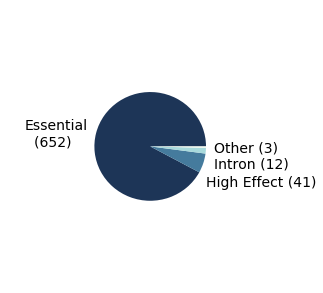

In [8]:
target_repart = all_guides[hits]['orf_type'].value_counts()

print target_repart

#0072B2 essential
#F0E442 high_effect
#009E73 intron
#D55E00 no_effect
#E69F00 putative_NF
#000000 exception

colors = ['#1d3557', '#457b9d', '#a8dadc', '#f1faee']
labels = ['Essential', 'High effect', 'Intron', 'Other']
fracs = [652,41,12,3]

plt.figure(figsize = (5,5))
ax1 = plt.subplot(111)

ax1.pie(fracs, colors = colors, radius = 0.5)

plt.text(0.05,0.5,'Essential\n  (652)', fontsize =14, transform=ax1.transAxes)
plt.text(0.7,0.35,'High Effect (41)', fontsize =14, transform=ax1.transAxes)
plt.text(0.73,0.42,'Intron (12)', fontsize =14, transform=ax1.transAxes)
plt.text(0.73,0.48,'Other (3)', fontsize =14, transform=ax1.transAxes)


In [9]:
stop_codon_CG1 = (all_guides['mut1_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG1])

stop_codon_CT1 = (all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT1])


stop_codon_CG2 = (all_guides['mut2_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG2])

stop_codon_CT2 = (all_guides['mut2_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT2])

all_stop = stop_codon_CG1 | stop_codon_CT1 | stop_codon_CG2 | stop_codon_CT2

print len(all_guides[all_stop])
# define filters for stop codon generating guides

480
752
240
473
1674


In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import the function which will allow us to make inset plots

5087
10725
15812
277
809
0.313953488372 0.406210473058 0.0546473610462
0.686046511628 0.593789526942 0.0782830972415


(0, 0.2)

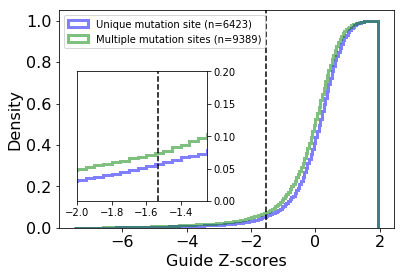

In [11]:
single_mut = all_guides['mut2_C>G'].isin([np.NaN])
# filter for gRNAs with only one editable nucleotide

over_threshold = all_guides['over_threshold'] == 'Yes'
# filter for GNEs

known_mut = all_guides['mut1_C>G'] != 'invalid seq'
# filter for guides which have predictable mutations

print len(all_guides[single_mut & known_mut].index)
print len(all_guides[~single_mut& known_mut].index)
print len(all_guides[single_mut & known_mut].index) + len(all_guides[~single_mut& known_mut].index)
# get group size


bins = np.arange(-7.5,2,0.05)

plt.figure(figsize = (6,4))
ax1 = plt.subplot(111)
#make figure

ax1.hist(all_guides[single_mut]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[~single_mut]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot data for both groups


ax1.legend(['Unique mutation site (n=6423)', 'Multiple mutation sites (n=9389)'])
ax1.axvline(-1.53, color = 'k', linestyle = '--')

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



print len(all_guides[single_mut & over_threshold & known_mut])
print len(all_guides[~single_mut & over_threshold & known_mut])

print 351.0/1118, 6423.0/15812 , 351.0/6423
print 767.0/1118, 9389.0/15812 , 735.0/9389

####### make inset
axins = inset_axes(ax1, width=1.8, height=1.8, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)

axins.yaxis.tick_right()

axins.hist(all_guides[single_mut]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[~single_mut]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.axvline(-1.53, color = 'k', linestyle = '--')
axins.set_xlim(-2,-1.25)
axins.set_ylim(0,0.2)




480
752
240
473
12301


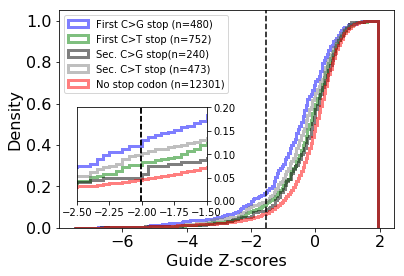

In [12]:
stop_codon_CG1 = (all_guides['mut1_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG1])

stop_codon_CT1 = (all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT1])


stop_codon_CG2 = (all_guides['mut2_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG2])

stop_codon_CT2 = (all_guides['mut2_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT2])

no_stop_codon_CGT1 = (~all_guides['mut1_C>G'].str.contains('\*')) & (~all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[no_stop_codon_CGT1])
# set filter for stop codons and their position, or no stop codons at all (last one)

bins = np.arange(-7.5,2,0.05)

plt.figure(figsize = (6,4))

ax1 = plt.subplot(111)

ax1.hist(all_guides[stop_codon_CG1]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CT1]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CG2]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CT2]['z_score_meanSE'], density=True, bins = bins, color='grey', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[no_stop_codon_CGT1]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot data


ax1.legend(['First C>G stop (n=480)', 'First C>T stop (n=752)', 'Sec. C>G stop(n=240)', 'Sec. C>T stop (n=473)', 
            'No stop codon (n=12301)'], loc = 'upper left')

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.axvline(-1.53, color = 'k', linestyle = '--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# format plot

##### make inset
axins = inset_axes(ax1, width=1.8, height=1.3, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)

axins.yaxis.tick_right()

axins.hist(all_guides[stop_codon_CG1]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CT1]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CG2]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CT2]['z_score_meanSE'], density=True, bins = bins, color='grey', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

axins.hist(all_guides[no_stop_codon_CGT1]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.2)


plt.axvline(-2.01, color = 'k', linestyle = '--')

In [13]:
print stats.ks_2samp(all_guides[stop_codon_CG1]['z_score_meanSE'], all_guides[stop_codon_CT2]['z_score_meanSE'])


Ks_2sampResult(statistic=0.08883456659619449, pvalue=0.04375310746354067)


### Add melting temp

34.0748995193


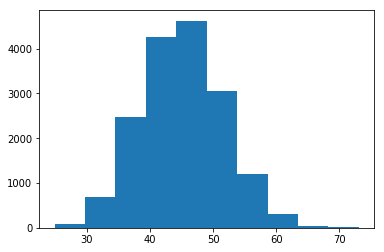

In [14]:
from Bio.SeqUtils import MeltingTemp


chip_annot_data['grna_binding'] = np.nan
chip_annot_data['grna_binding'] = chip_annot_data['grna_binding'].astype('float64')

chip_annot_data['%GC'] = np.nan
chip_annot_data['%GC'] = chip_annot_data['%GC'].astype('float64')



for guide in chip_annot_data.index:
    
    seq = chip_annot_data.loc[guide]['sequence']
        
      
    gc_con = len([x for x in seq if x in ['G','C']])*1.0/20*100
    
    chip_annot_data.at[guide, ('%GC')] = gc_con




for guide in chip_annot_data.index:
    
    seq = chip_annot_data.loc[guide]['sequence']
    
    seq = seq.replace('T', 'U')
    
    binding_energy = MeltingTemp.Tm_NN(seq, nn_table=MeltingTemp.R_DNA_NN1)
    
    chip_annot_data.at[guide, ('grna_binding')] = binding_energy
    
#######ADD ORF STRAND################
strand_df = pd.read_csv('./orf_strand.tsv', sep = '\t', index_col=0, header =None,
                            names = ['stan_name','name','strand'])


orf_strand_dict = {} 

for orf in strand_df.index:
    
    strand = strand_df.loc[orf]['strand']
    
    if strand == -1:
        
        orf_strand_dict[orf] = 0
        
    else:
        orf_strand_dict[orf] = 1
        
chip_annot_data['orf_strand'] = np.nan
chip_annot_data['orf_strand'] = chip_annot_data['orf_strand'].astype('object')
        
for guide in chip_annot_data.index:

    target = chip_annot_data.loc[guide]['target']
    
    if target in orf_strand_dict.keys():
    
        chip_annot_data.at[guide, ('orf_strand')] = orf_strand_dict[target]    
####################################   
    
    
    
abundance_mesured = [x for x in chip_annot_data.index if x in z_score_table.index]

all_guides = chip_annot_data.loc[abundance_mesured]

all_guides['z_score_meanSE'] = z_score_table['z_score_meanSE']
all_guides['over_threshold'] = z_score_table['over_threshold']


hits = all_guides['over_threshold'] == 'Yes'
no_hit = all_guides['over_threshold'] == 'No'    
    

    
plt.hist(chip_annot_data['grna_binding'])
        




a = 'AUGCCGCGAUG'
a = a.replace('T', 'U')

print MeltingTemp.Tm_NN(a, nn_table=MeltingTemp.R_DNA_NN1)

In [15]:

all_guides['%G'] = all_guides['sequence'].str.count('G')*1.0/20*100
all_guides['%C'] = all_guides['sequence'].str.count('C')*1.0/20*100


In [16]:
stop_codon_CG1 = (all_guides['mut1_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG1])


stop_codon_CT1 = (all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT1])


stop_codon_CG2 = (all_guides['mut2_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG2])

stop_codon_CT2 = (all_guides['mut2_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT2])

all_stop = stop_codon_CG1 | stop_codon_CT1 | stop_codon_CG2 | stop_codon_CT2
print len(all_guides[all_stop])

print all_guides[all_stop].index[0]

all_stop_guides = all_guides[all_stop]

480
752
240
473
1674
chrI_59828r


In [17]:
all_non_stop_guides = all_guides[~all_stop]

print len(all_non_stop_guides)
print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01])
print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01])

15080
14504
576


count    1674.000000
mean       43.826690
std         6.391562
min        26.095350
25%        39.399220
50%        43.869750
75%        48.020327
max        69.381311
Name: grna_binding, dtype: float64
count    576.000000
mean      47.453882
std        6.891307
min       27.609869
25%       42.365472
50%       47.448378
75%       52.151185
max       68.030305
Name: grna_binding, dtype: float64
count    14504.000000
mean        45.192573
std          6.478282
min         24.858589
25%         40.654968
50%         45.097419
75%         49.569735
max         73.085959
Name: grna_binding, dtype: float64


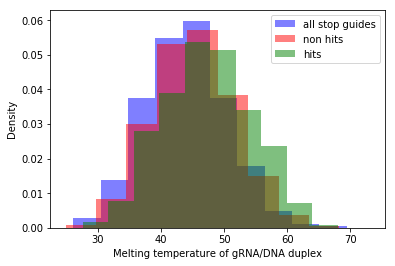

In [18]:
print all_stop_guides['grna_binding'].describe()
print all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'].describe()
print all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'].describe()
plt.hist(all_stop_guides['grna_binding'], density=True, color = 'b', alpha = 0.5)
plt.hist(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'], 
         density=True, color = 'r', alpha = 0.5)
plt.hist(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'], 
         density=True, color = 'g', alpha = 0.5)

plt.xlabel('Melting temperature of gRNA/DNA duplex')
plt.ylabel('Density')
plt.legend(['all stop guides', 'non hits', 'hits'])

### Import definitions from other script

1 3 133 0.0225563909774
2 20 334 0.059880239521
3 27 443 0.0609480812641
4 44 397 0.110831234257
5 26 170 0.152941176471
6 12 65 0.184615384615
132 1542
132 1542


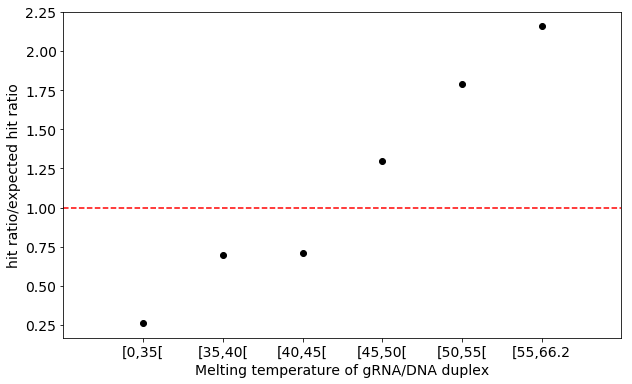

In [19]:
bins = [0, 35, 40, 45, 50, 55, 73.1]



rna_energy_groups = all_stop_guides.groupby(np.digitize(all_stop_guides.grna_binding, bins))


all_pos = 0
all_neg = 0

pos_n_list = []
neg_n_list = []


for x in rna_energy_groups.groups.keys():
    
    sub_df = all_stop_guides.loc[rna_energy_groups.groups[x]]
    
    n_pos = len(sub_df[sub_df['z_score_meanSE'] <= -2.01])
    n_neg = len(sub_df[sub_df['z_score_meanSE'] > -2.01])
    
    all_pos += n_pos
    all_neg += n_neg
    
    pos_n_list.append(n_pos)
    neg_n_list.append(n_neg)
    
    
    print x, n_pos, n_neg, 1.0*n_pos/n_neg
    
data_list_stop_bins = [(pos_n_list[x]*1.0/neg_n_list[x])/(132.0/1542) for x in range(0,6)]


plt.figure(figsize = (10,6))    

plt.plot(range(1,7), [(pos_n_list[x]*1.0/neg_n_list[x])/(132.0/1542) for x in range(0,6)], 'ko')
plt.axhline(1.0, color ='red', ls = '--')
plt.xlim(0,7)

plt.xticks(range(1,7), ['[0,35[','[35,40[','[40,45[','[45,50[','[50,55[' ,'[55,66.2'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Melting temperature of gRNA/DNA duplex', fontsize = 14)
plt.ylabel('hit ratio/expected hit ratio', fontsize = 14)


print all_pos, all_neg
print sum(pos_n_list), sum(neg_n_list)

1 19 792 0.0239898989899
2 74 2382 0.0310663308144
3 117 3980 0.0293969849246
4 167 4011 0.0416355023685
5 112 2370 0.0472573839662
6 87 969 0.0897832817337
576 14504
576 14504


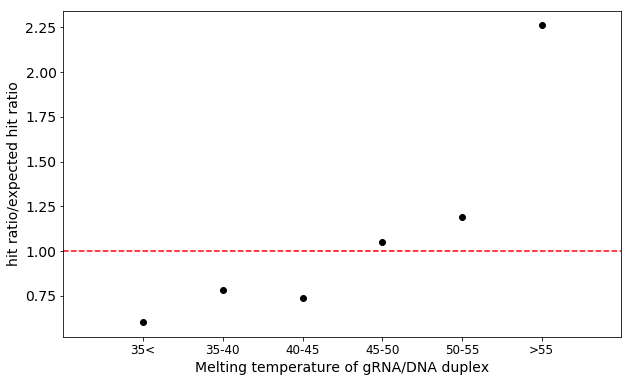

In [20]:
bins = [0, 35, 40, 45, 50, 55, 73.1]



rna_energy_groups = all_non_stop_guides.groupby(np.digitize(all_non_stop_guides.grna_binding, bins))


all_pos = 0
all_neg = 0

pos_n_list = []
neg_n_list = []

for x in rna_energy_groups.groups.keys():
    
    sub_df = all_non_stop_guides.loc[rna_energy_groups.groups[x]]
    
    n_pos = len(sub_df[sub_df['z_score_meanSE'] <= -2.01])
    n_neg = len(sub_df[sub_df['z_score_meanSE'] > -2.01])
    
    all_pos += n_pos
    all_neg += n_neg
    
    pos_n_list.append(n_pos)
    neg_n_list.append(n_neg)
    
    
    print x, n_pos, n_neg, 1.0*n_pos/n_neg
    
data_list_non_stop_bins = [(pos_n_list[x]*1.0/neg_n_list[x])/(576.0/14504) for x in range(0,6)]

plt.figure(figsize = (10,6))    

plt.plot(range(1,7), [(pos_n_list[x]*1.0/neg_n_list[x])/(576.0/14504) for x in range(0,6)], 'ko')
plt.axhline(1.0, color ='red', ls = '--')
plt.xlim(0,7)

plt.xticks(range(1,7), ['35<','35-40','40-45','45-50','50-55' ,'>55'], fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('Melting temperature of gRNA/DNA duplex', fontsize = 14)
plt.ylabel('hit ratio/expected hit ratio', fontsize = 14)


print all_pos, all_neg
print sum(pos_n_list), sum(neg_n_list)

## Figure 4

In [22]:
print len(all_guides)

16754


6485
8595


(0, 0.15)

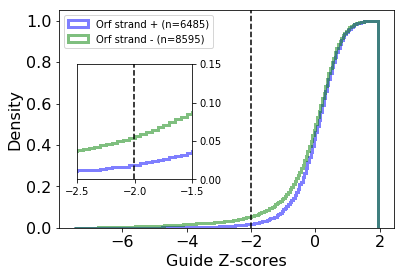

In [23]:
ax1 = plt.subplot(111)
# create subplot


bins = np.arange(-7.5,2,0.05)
# make bins for histogram

ax1.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'], density=True, bins = bins, 
         color='blue', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting + orf strand

ax1.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'], density=True, bins = bins, 
         color='green', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting - orf strand

print len(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'])
print len(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'])
# print category sums to make sure things add up and add to legend


plt.legend(['Orf strand + (n=6485)', 'Orf strand - (n=8595)'], loc = 'upper left')
# add legend
plt.axvline(-2.01, color = 'k', linestyle = '--')
# add line for threshold

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# adds x and y labels, formats them

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# formats the ticks


axins = inset_axes(ax1, width=1.6, height=1.6, bbox_to_anchor=(.04, .2, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'], density=True, bins = bins, 
           color='blue', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
axins.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'], density=True, bins = bins, 
           color='green', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plots the two same curves again for the inset figure


axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.15)
# add threshold line, and sets the window shown by the inset 

## import data from notebook 5 to generate heatmap

Text(0.5,36.456,'Essential gene GNE ratio\n\n\n')

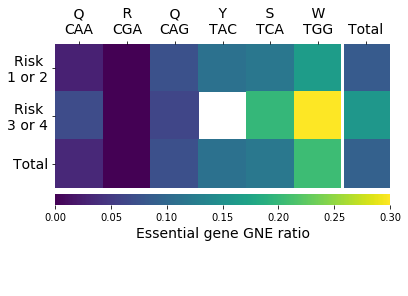

In [24]:
stop_start_by_risk = pd.read_csv('./stop_codon_efficiency_source_data.csv', sep = ',', index_col =0)

stop_start_by_risk

ax = sns.heatmap(stop_start_by_risk, cmap='viridis', vmin=0, square=True,
                 cbar_kws = dict(use_gridspec=False,location="bottom",pad=0.03, label = 'GNE rate',
                                aspect =30))
plt.yticks([0.5,1.5,2.5], ['Risk \n1 or 2', 'Risk \n3 or 4', 'Total'], rotation = 0, fontsize=14)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], [' Q \nCAA', ' R \nCGA', ' Q \nCAG', ' Y \nTAC', 
                                           ' S \nTCA', ' W \nTGG', 'Total'],
           fontsize=14)
ax.xaxis.tick_top()
plt.axvline(6, color='white', linewidth = 3)

ax.figure.axes[-1].set_xlabel('Essential gene GNE ratio\n\n\n', size=14)


6485
8595
39.084195438115415 40.0
43.65112994350282 45.0
24.683721799825502 25.0
27.175141242937855 25.0
14.400473638289917 15.0
16.475988700564972 15.0
Ttest_indResult(statistic=-12.701068924603433, pvalue=1.0965084385359608e-33)
Ttest_indResult(statistic=-6.973689007028636, pvalue=6.712209740915404e-12)
Ttest_indResult(statistic=-7.098668954555655, pvalue=2.884516590060231e-12)
16046 708
1.11684862524
1.10093370292
1.14412824983


Text(-0.185,1.01,'F')

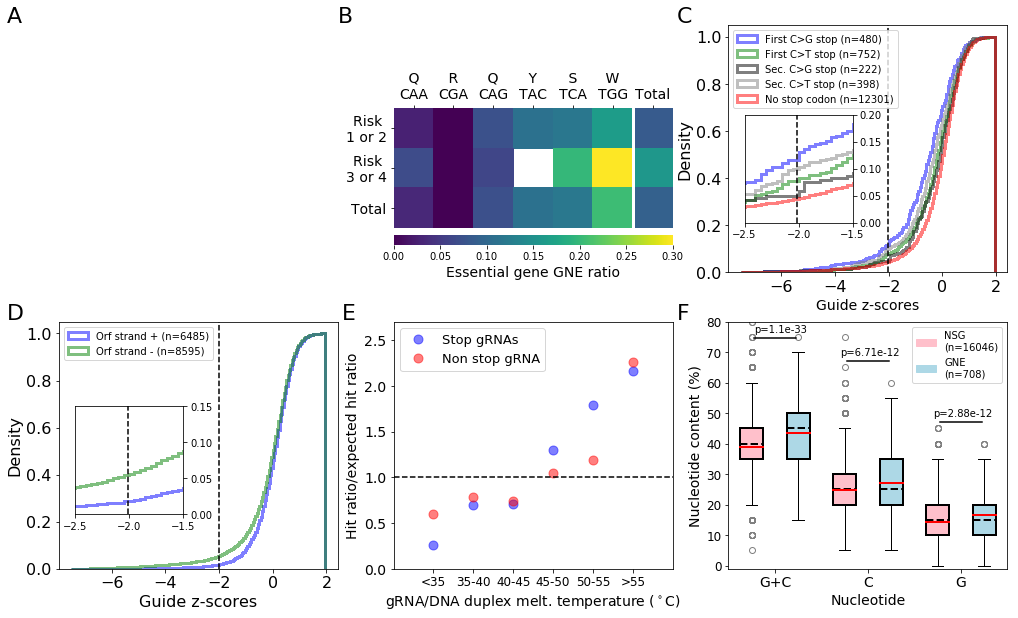

In [25]:
plt.figure(figsize = (17,10))


########################
ax1 = plt.subplot(231)

ax1.text(-0.185, 1.01,'A',transform=ax1.transAxes, fontsize = 22)
ax1.axis('off')


########################
ax2 = plt.subplot(232)


sns.heatmap(stop_start_by_risk, cmap='viridis', vmin=0, square=True,
                 cbar_kws = dict(use_gridspec=False,location="bottom",pad=0.03, label = 'GNE rate',
                                aspect =30))
plt.yticks([0.5,1.5,2.5], ['Risk \n1 or 2', 'Risk \n3 or 4', 'Total'], rotation = 0, fontsize=14)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], [' Q \nCAA', ' R \nCGA', ' Q \nCAG', ' Y \nTAC', 
                                           ' S \nTCA', ' W \nTGG', 'Total'],
           fontsize=14)
ax2.xaxis.tick_top()
plt.axvline(6, color='white', linewidth = 3)

ax2.figure.axes[-1].set_xlabel('Essential gene GNE ratio', size=14)

ax1.text(1, 1.01,'B',transform=ax1.transAxes, fontsize = 22)


########################
ax1=plt.subplot(233)

ax1.hist(all_guides[stop_codon_CG1]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CT1]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CG2]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_guides[stop_codon_CT2]['z_score_meanSE'], density=True, bins = bins, color='grey', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

ax1.hist(all_guides[no_stop_codon_CGT1]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

ax1.legend(['First C>G stop (n=480)', 'First C>T stop (n=752)', 'Sec. C>G stop (n=222)', 'Sec. C>T stop (n=398)', 
            'No stop codon (n=12301)'], loc = 'upper left')

plt.xlabel('Guide z-scores', fontsize = 14)
plt.ylabel('Density', fontsize = 16)
plt.axvline(-2.01, color = 'k', linestyle = '--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


axins = inset_axes(ax1, width=1.5, height=1.5, bbox_to_anchor=(.04, .18, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)

axins.yaxis.tick_right()

axins.hist(all_guides[stop_codon_CG1]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CT1]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CG2]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides[stop_codon_CT2]['z_score_meanSE'], density=True, bins = bins, color='grey', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

axins.hist(all_guides[no_stop_codon_CGT1]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)

axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.2)





ax1.text(-0.185, 1.01,'C',transform=ax1.transAxes, fontsize = 22)



########################
ax1 = plt.subplot(234)



bins = np.arange(-7.5,2,0.05)
# make bins for histogram

ax1.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'], density=True, bins = bins, 
         color='blue', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting + orf strand

ax1.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'], density=True, bins = bins, 
         color='green', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting - orf strand

print len(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'])
print len(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'])
# print category sums to make sure things add up and add to legend


plt.legend(['Orf strand + (n=6485)', 'Orf strand - (n=8595)'], loc = 'upper left')
# add legend
plt.axvline(-2.01, color = 'k', linestyle = '--')
# add line for threshold

plt.xlabel('Guide z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# adds x and y labels, formats them

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# formats the ticks


axins = inset_axes(ax1, width=1.5, height=1.5, bbox_to_anchor=(.04, .2, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'], density=True, bins = bins, 
           color='blue', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
axins.hist(all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'], density=True, bins = bins, 
           color='green', alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plots the two same curves again for the inset figure


axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.15)
# add threshold line, and sets the window shown by the inset 

ax1.text(-0.185, 1.01,'D',transform=ax1.transAxes, fontsize = 22)


########################
ax1 = plt.subplot(235)

ax1.plot([x for x in range(1,7)], data_list_stop_bins, 'bo', alpha = 0.5, ms = 9)
ax1.plot([x for x in range(1,7)], data_list_non_stop_bins, 'ro', alpha =0.5, ms = 9)

plt.legend(['Stop gRNAs', 'Non stop gRNA'], fontsize=13)


plt.axhline(1.0, color ='black', ls = '--')
plt.xlim(0,7)

plt.xticks(range(1,7), ['<35','35-40','40-45','45-50','50-55' ,'>55'], fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('Hit ratio/expected hit ratio', fontsize = 14)

plt.ylim(0, 2.7)


ax1.text(-0.185, 1.01,'E',transform=ax1.transAxes, fontsize = 22)

########################
ax1 = plt.subplot(236)

import matplotlib.patches as mpatches

pink_patch = mpatches.Patch(color='pink', label='NSG\n(n=16046)')
blue_patch = mpatches.Patch(color='lightblue', label='GNE\n(n=708)')

colors = ['pink','lightblue','pink','lightblue','pink','lightblue']


data =[ all_guides[all_guides['z_score_meanSE'] > -2.01]['%GC'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%GC'],
       
        all_guides[all_guides['z_score_meanSE'] > -2.01]['%C'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%C'],
       
        all_guides[all_guides['z_score_meanSE'] > -2.01]['%G'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%G']]

for x in data:
    print np.mean(x), np.median(x)

bplot1 = ax1.boxplot(data, patch_artist=True, meanline=True, showmeans=True,
                    meanprops={'linestyle':'-', 'color':'red', 'linewidth':2})

plt.legend(handles=[pink_patch, blue_patch], fontsize=10)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)
plt.setp(bplot1['medians'], linestyle='--')

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)

plt.xticks([1.5,3.5,5.5],['G+C', 'C', 'G'], fontsize=14)

plt.ylim(-1,80)

plt.plot([1.05,1.95], [74.5,74.5], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[0],data[1], equal_var=False)[1], 2)))
plt.text(1.05,76.5, annot, fontsize = 10)


plt.plot([3.05,3.95], [67,67], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[2], 
                                                                    data[3], equal_var=False)[1], 2)))
plt.text(2.9,69, annot, fontsize = 10)


plt.plot([5.05,5.95], [47,47], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[4], 
                                                                    data[5], equal_var=False)[1], 2)))
plt.text(4.9,49, annot, fontsize = 10)
             
print stats.ttest_ind(data[0], data[1], equal_var=False)
print stats.ttest_ind(data[2], data[3], equal_var=False)
print stats.ttest_ind(data[4], data[5], equal_var=False)
print len(data[0]), len(data[1])

print (43.65112994350282)/39.084195438115415
print (27.175141242937855)/24.683721799825502
print (16.475988700564972)/14.400473638289917

plt.ylabel('Nucleotide content (%)', fontsize=14)
plt.xlabel('Nucleotide', fontsize=14)
plt.yticks(fontsize=12)

ax1.text(-0.185, 1.01,'F',transform=ax1.transAxes, fontsize = 22)

#plt.savefig('./figure6_revisedv2.svg', format = 'svg', dpi = 600)
# save figure

In [26]:
all_non_stop_guides = all_guides[~all_stop]

print len(all_non_stop_guides)


print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01])
print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01])

print max(all_non_stop_guides['grna_binding'])

15080
14504
576
73.085959263


Ks_2sampResult(statistic=0.14854643151698205, pvalue=3.575871917446154e-17)
Ks_2sampResult(statistic=0.009092066066987647, pvalue=0.5802587150699545)
Ks_2sampResult(statistic=0.1394543654499944, pvalue=3.058575315714932e-15)


Text(0,0.5,'Guide/DNA duplex melt. temperature ($^\\circ$C)')

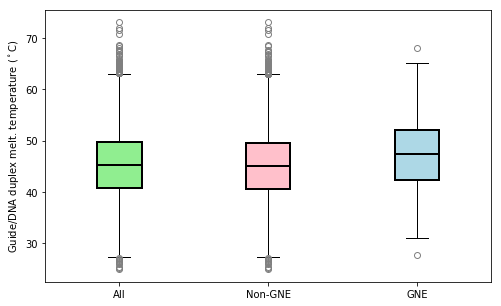

In [27]:
melt_temps =[all_non_stop_guides['grna_binding'], 
             all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
             all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding']]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

bplot1 = ax1.boxplot(melt_temps, labels=['All', 'Non-GNE', 'GNE'], patch_artist = True)


colors = ['lightgreen', 'pink','lightblue']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)

print stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'No']['grna_binding'],
               all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'Yes']['grna_binding'])

print stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'No']['grna_binding'],
               all_non_stop_guides['grna_binding'])

print stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'Yes']['grna_binding'],
               all_non_stop_guides['grna_binding'])

plt.ylabel('Guide/DNA duplex melt. temperature ($^\circ$C)',fontsize = 10)


## Properties of non-stop guide

### melting temperature (panel F)

### Mutation site number

14138
4631
9507
14138


(0, 0.2)

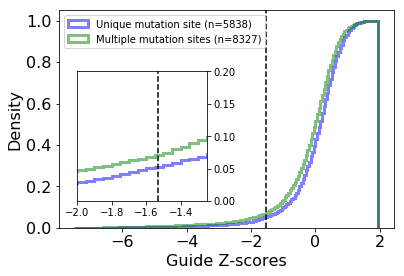

In [28]:
single_mut = all_non_stop_guides['mut2_C>G'].isin([np.NaN])
# set a filter for guides with a second editable base
over_threshold = all_non_stop_guides['z_score_meanSE'] <= -2.01
# set a filter for GNEs
known_mut = all_non_stop_guides['mut1_C>G'] != 'invalid seq'
# set a filter for guides with predictable mutations

print len(all_non_stop_guides[known_mut].index)
# print number of guides with predictable mutations
print len(all_non_stop_guides[single_mut & known_mut].index)
# print number of guides with a single predictable mutation site
print len(all_non_stop_guides[~single_mut& known_mut].index)
# print number of guides with multiple predictable mutation sites

print len(all_non_stop_guides[single_mut & known_mut].index) + len(all_non_stop_guides[~single_mut& known_mut].index)


bins = np.arange(-7.5,2,0.05)
# define bins for the histogram

plt.figure(figsize = (6,4))
#create figure

ax1 = plt.subplot(111)
# create a subplot 

ax1.hist(all_non_stop_guides[single_mut& known_mut]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_non_stop_guides[~single_mut& known_mut]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative z-score distributions for both categories


ax1.legend(['Unique mutation site (n=5838)', 'Multiple mutation sites (n=8327)'], loc = 'upper left')
# add legend
ax1.axvline(-1.53, color = 'k', linestyle = '--')
# add threshold line

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# add axis labels and format them

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# format ticks

axins = inset_axes(ax1, width=1.8, height=1.8, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_non_stop_guides[single_mut & known_mut]['z_score_meanSE'], density=True, bins = bins, color='blue', 
           alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
axins.hist(all_non_stop_guides[~single_mut & known_mut]['z_score_meanSE'], density=True, bins = bins, color='green', 
           alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plots the two same curves again for the inset figure

axins.axvline(-1.53, color = 'k', linestyle = '--')
axins.set_xlim(-2,-1.25)
axins.set_ylim(0,0.2)
# add threshold line, and sets the window shown by the inset 

### statistical test

In [29]:
print stats.ks_2samp(all_non_stop_guides[single_mut & known_mut]['z_score_meanSE'], 
                     all_non_stop_guides[~single_mut & known_mut]['z_score_meanSE'])
# kolmogorov-smirnov two sample test to see if the z-score dists differ for non-stop guides generating with either 
# one or two bases in the high efficiency editing window of Target-AID

Ks_2sampResult(statistic=0.09554114361448474, pvalue=3.1822286724168793e-25)


### Orf strand

In [30]:
print len(all_non_stop_guides)

15080


### Statistical test

In [31]:
print stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['strand'] == '+']['z_score_meanSE'], 
                     all_non_stop_guides[all_non_stop_guides['strand'] == '-']['z_score_meanSE'])

# kolmogorov-smirnov two sample test to see if the z-score dists differ for non-stop generating guides targeting
# either the coding or non coding strand of the orf

Ks_2sampResult(statistic=0.06839814257899487, pvalue=1.6642413374225178e-15)


### Chromosomal strand panel

In [32]:
print all_guides['orf_strand'].unique()

unknown_strand = (all_guides['orf_strand'] != 0) & (all_guides['orf_strand'] != 1)

all_guides[unknown_strand]['orf_type'].unique()

[0 1 nan]


array(['putative_NF', 'intron'], dtype=object)

7850  guides with orf annotated on the plus strand
8030  guides with orf annotated on the minus strand
70 764 834
62 778 840
261 6872 7133
302 6771 7073


(0, 0.2)

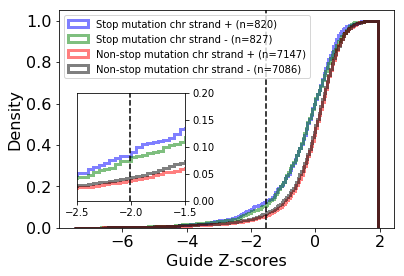

In [33]:
orf_on_chr_plus = (all_guides['orf_strand'] == 1)
print len(all_guides[orf_on_chr_plus].index), ' guides with orf annotated on the plus strand'
orf_on_chr_minus = (all_guides['orf_strand'] == 0)
print len(all_guides[orf_on_chr_minus].index), ' guides with orf annotated on the minus strand'
# create a filter for chromosomal strand of the target orfs. The annotations exclude introns and put NF peptides
# targeting guides

chr_plus_indexes = []
chr_minus_indexes = []
# empty container that will store the indexes of the guides on the chromosomal + and - strand.

for guide in list(all_guides[orf_on_chr_plus].index):
    # loop through all guides targeting an orf on the chr + strand. The idea is to use the orf chr strand and
    # the guide targeted strand to deduce the chr strand targeted by the guide
       
    if all_guides.loc[guide]['strand'] == '+':      
        chr_plus_indexes.append(guide)
        # if guide is +/+, it targets chr stand +
        
    elif all_guides.loc[guide]['strand'] == '-':
        chr_minus_indexes.append(guide)
        # if guide is +/-, it targets chr stand -
        
for guide in list(all_guides[orf_on_chr_minus].index):
    # do the same thing with guides targeting the orfs on the minus strand
    
    if all_guides.loc[guide]['strand'] == '+':
        chr_minus_indexes.append(guide)
        # if guide is -/+, it targets chr stand -
        
    elif all_guides.loc[guide]['strand'] == '-':    
        chr_plus_indexes.append(guide)
        # if guide is -/-, it targets chr stand +
        
stop_chr_plus = [x for x in chr_plus_indexes if x in list(all_stop_guides.index)]
stop_chr_minus = [x for x in chr_minus_indexes if x in list(all_stop_guides.index)]
# generate index lists for stop generating guides

non_stop_chr_plus = [x for x in chr_plus_indexes if x in list(all_non_stop_guides.index)]
non_stop_chr_minus = [x for x in chr_minus_indexes if x in list(all_non_stop_guides.index)]
# generate index lists for non stop generating guides

hit_guide = (all_guides['z_score_meanSE'] <= -2.01)
# create a filter for GNEs

for group in [stop_chr_plus, stop_chr_minus, non_stop_chr_plus,non_stop_chr_minus]:
    
    GNEs =   len(all_guides.loc[group][all_guides.loc[group]['z_score_meanSE'] <= -2.01])
    NSGs =   len(all_guides.loc[group][all_guides.loc[group]['z_score_meanSE'] > -2.01])
    
    print GNEs, NSGs, (GNEs + NSGs)
# print the number of guides in each category to validate the sums



bins = np.arange(-7.5,2,0.05)
# make bins for histogram

plt.figure(figsize = (6,4))
# make figure, set size

ax1 = plt.subplot(111)
# make plot object

ax1.hist(all_guides.loc[stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting + chr strand
ax1.hist(all_guides.loc[stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting - chr strand

ax1.hist(all_guides.loc[non_stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for non stop generating guides targeting + chr strand
ax1.hist(all_guides.loc[non_stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for non stop generating guides targeting - chr strand

plt.legend(['Stop mutation chr strand + (n=820)', 'Stop mutation chr strand - (n=827)', 
            'Non-stop mutation chr strand + (n=7147)', 'Non-stop mutation chr strand - (n=7086)'], loc = 'upper left')
# add a legend

plt.axvline(-1.53, color = 'k', linestyle = '--')
# add a vertical line for the threshold

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# add axis labels

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# format ticks


axins = inset_axes(ax1, width=1.5, height=1.5, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_guides.loc[stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[non_stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[non_stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plots the four same curves again for the inset figure

axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.2)
# add threshold line, and sets the window shown by the inset 

### Statistical tests for chr stand

In [34]:
stop_on_plus = all_guides.loc[stop_chr_plus]
print len(stop_on_plus)

non_stop_on_plus = all_guides.loc[non_stop_chr_plus]
print len(non_stop_on_plus)



stop_on_minus = all_guides.loc[stop_chr_minus]
print len(stop_on_minus)

non_stop_on_minus = all_guides.loc[non_stop_chr_minus]
print len(non_stop_chr_minus)


834
7133
840
7073


In [35]:
print stats.ks_2samp(stop_on_plus['z_score_meanSE'], 
                     stop_on_minus['z_score_meanSE'])
# kolmogorov-smirnov two sample test to see if the z-score dists differ for stop generating guides
print stats.ks_2samp(non_stop_on_plus['z_score_meanSE'], 
                     non_stop_on_minus['z_score_meanSE'])
# kolmogorov-smirnov two sample test to see if the z-score dists differ for stop generating guides

print stats.fisher_exact([[70,62], [764,778]])
# fischer's exact test to if the hit proportion differ for stop generating guides chr stand target
print stats.fisher_exact([[261,301], [6872,6771]])
# fischer's exact test to if the hit proportion differ for non stop generating guides chr stand target



Ks_2sampResult(statistic=0.033838643371017496, pvalue=0.7170793581365553)
Ks_2sampResult(statistic=0.023412150418928357, pvalue=0.040111711310564374)
(1.1497213308562744, 0.4687586839370303)
(0.8543654446373942, 0.0706398818015396)


In [36]:
co_edit_risk_12 = all_non_stop_guides['co_edit_risk'] <=2

co_edit_risk_34 = all_non_stop_guides['co_edit_risk'] >2

## Figure S13

A
12934
2146
Ks_2sampResult(statistic=0.12201028924393703, pvalue=2.319102980280532e-24)
####
B
834
840
7133
7073
####
1674
1542
132
Ks_2sampResult(statistic=0.22429548402311045, pvalue=7.2746246999082104e-06)
Ks_2sampResult(statistic=0.2066091017703921, pvalue=4.542292876404302e-05)
Ttest_indResult(statistic=-5.2350368321258225, pvalue=5.292108871917206e-07)
<class 'matplotlib.axes._subplots.AxesSubplot'>
15080
14504
576
Ks_2sampResult(statistic=0.14605836704050984, pvalue=8.444755813146051e-11)
Ks_2sampResult(statistic=0.14047947981137637, pvalue=4.898196107021806e-10)
Ttest_indResult(statistic=-7.740685158309278, pvalue=4.070249224395359e-14)


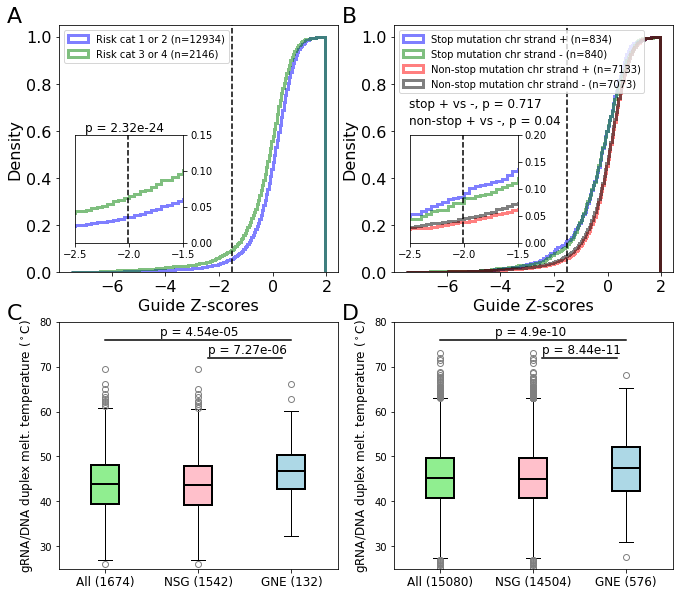

In [47]:
plt.figure(figsize = (11,10))


########################
ax1 = plt.subplot(221)

bins = np.arange(-7.5,2,0.05)

ax1.hist(all_non_stop_guides[co_edit_risk_12]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
ax1.hist(all_non_stop_guides[co_edit_risk_34]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative z-score distributions for both categories

print 'A'
print len(all_non_stop_guides[co_edit_risk_12])
print len(all_non_stop_guides[co_edit_risk_34])
print stats.ks_2samp(all_non_stop_guides[co_edit_risk_12]['z_score_meanSE'],
                     all_non_stop_guides[co_edit_risk_34]['z_score_meanSE'])
print '####'

ax1.legend(['Risk cat 1 or 2 (n=12934)', 'Risk cat 3 or 4 (n=2146)'], loc = 'upper left')
# add legend
ax1.axvline(-1.53, color = 'k', linestyle = '--')
# add threshold line

ks2samp_risk = scipy.stats.ks_2samp(all_non_stop_guides[co_edit_risk_12]['z_score_meanSE'],
                                     all_non_stop_guides[co_edit_risk_34]['z_score_meanSE'])

annot =  str('p = '+ str(np.format_float_scientific(ks2samp_risk[1], 2)))
plt.text(-7,0.6, annot, fontsize = 12)


plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# add axis labels and format them

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# format ticks

axins = inset_axes(ax1, width=1.5, height=1.5, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_non_stop_guides[co_edit_risk_12]['z_score_meanSE'], density=True, bins = bins, color='blue', 
           alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
axins.hist(all_non_stop_guides[co_edit_risk_34]['z_score_meanSE'], density=True, bins = bins, color='green', 
           alpha = 0.5, histtype='step', cumulative=True, linewidth =3)
# plots the two same curves again for the inset figure

axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.15)
# add threshold line, and sets the window shown by the inset 


ax1.text(-0.185, 1.01,'A',transform=ax1.transAxes, fontsize = 22)
# add panel label

########################
ax1 = plt.subplot(222)


ax1.hist(all_guides.loc[stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting + chr strand
ax1.hist(all_guides.loc[stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for stop guides targeting - chr strand

ax1.hist(all_guides.loc[non_stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for non stop generating guides targeting + chr strand
ax1.hist(all_guides.loc[non_stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plot cumulative dist for non stop generating guides targeting - chr strand

ks2samp_stop = scipy.stats.ks_2samp(all_guides.loc[stop_chr_plus]['z_score_meanSE'],
                                     all_guides.loc[stop_chr_minus]['z_score_meanSE'])

annot =  str('stop + vs -, p = '+ str(np.round(ks2samp_stop[1], 3)))
plt.text(-7.4,0.7, annot, fontsize = 12)


ks2samp_nonstop = scipy.stats.ks_2samp(all_guides.loc[non_stop_chr_plus]['z_score_meanSE'],
                                     all_guides.loc[non_stop_chr_minus]['z_score_meanSE'])

annot =  str('non-stop + vs -, p = '+ str(np.round(ks2samp_nonstop[1], 3)))
plt.text(-7.4,0.63, annot, fontsize = 12)


print 'B'
print len(all_guides.loc[stop_chr_plus])
print len(all_guides.loc[stop_chr_minus])
print len(all_guides.loc[non_stop_chr_plus])
print len(all_guides.loc[non_stop_chr_minus])
print '####'

plt.legend(['Stop mutation chr strand + (n=834)', 'Stop mutation chr strand - (n=840)', 
            'Non-stop mutation chr strand + (n=7133)', 'Non-stop mutation chr strand - (n=7073)'], loc = 'upper left')
# add a legend

plt.axvline(-1.53, color = 'k', linestyle = '--')
# add a vertical line for the threshold

plt.xlabel('Guide Z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
# add axis labels

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# format ticks


axins = inset_axes(ax1, width=1.5, height=1.5, bbox_to_anchor=(.04, .1, .5, .5),
                   bbox_transform=ax1.transAxes, loc=3)
# create inset plot object

axins.yaxis.tick_right()
# change ticks position in the inset

axins.hist(all_guides.loc[stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='blue', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='green', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[non_stop_chr_plus]['z_score_meanSE'], density=True, bins = bins, color='red', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
axins.hist(all_guides.loc[non_stop_chr_minus]['z_score_meanSE'], density=True, bins = bins, color='black', alpha = 0.5,
         histtype='step', cumulative=True, linewidth =3)
# plots the four same curves again for the inset figure

axins.axvline(-2.01, color = 'k', linestyle = '--')
axins.set_xlim(-2.5,-1.5)
axins.set_ylim(0,0.2)
# add threshold line, and sets the window shown by the inset 



ax1.text(-0.185, 1.01,'B',transform=ax1.transAxes, fontsize = 22)
# add panel label

########################
ax1=plt.subplot(223)

melt_temps =[all_stop_guides['grna_binding'], 
             all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
             all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding']]

for x in melt_temps:
    print len(x)



bplot1 = ax1.boxplot(melt_temps, patch_artist=True)


for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)


ks2samp1 = stats.ks_2samp(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
               all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'])

ks2samp2 = stats.ks_2samp(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'],
               all_stop_guides['grna_binding'])

welch1 = stats.ttest_ind(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
               all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'], equal_var=False)

print ks2samp1
print ks2samp2
print welch1

stop_all = len(all_stop_guides)
stop_over_t = len(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01])
stop_under_t = len(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01])


plt.ylabel('gRNA/DNA duplex melt. temperature ($^\circ$C)',fontsize = 12)

plt.ylim(25,80)

plt.xticks([1,2,3], [('All ('+str(stop_all)+')'), 'NSG ('+str(stop_under_t)+')', 
                     'GNE ('+str(stop_over_t)+')'], fontsize=12)


plt.plot([2.1,2.9], [72,72], linestyle = '-', color = 'k')

annot =  str('p = '+ str(np.format_float_scientific(ks2samp1[1], 2)))

plt.text(2.1,73, annot, fontsize = 12)


plt.plot([1,3], [76,76], linestyle = '-', color = 'k')

annot =  str('p = '+ str(np.format_float_scientific(ks2samp2[1], 2)))

plt.text(1.59,77, annot, fontsize = 12)




ax1.text(-0.185, 1.01,'C',transform=ax1.transAxes, fontsize = 22)
# add panel label

########################
ax1 = plt.subplot(224)

print type(ax1)

melt_temps =[all_non_stop_guides['grna_binding'], 
             all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
             all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding']]

for x in melt_temps:
    print len(x)

bplot1 = ax1.boxplot(melt_temps, patch_artist=True)


for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)


ks2samp1 = stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
               all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'])

ks2samp2 = stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'],
               all_non_stop_guides['grna_binding'])

welch1 = stats.ttest_ind(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['grna_binding'],
               all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['grna_binding'],
                         equal_var=False)

print ks2samp1
print ks2samp2
print welch1


n_non_stop_all = len(all_non_stop_guides)
n_non_stop_over_t = len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01])
n_non_stop_under_t = len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01])


plt.ylabel('gRNA/DNA duplex melt. temperature ($^\circ$C)',fontsize = 12)

plt.ylim(25,80)

plt.xticks([1,2,3], [('All ('+str(n_non_stop_all)+')'), 'NSG ('+str(n_non_stop_under_t)+')', 
                     'GNE ('+str(n_non_stop_over_t)+')'], fontsize=12)


plt.plot([2.1,2.9], [72,72], linestyle = '-', color = 'k')

annot =  str('p = '+ str(np.format_float_scientific(ks2samp1[1], 2)))

plt.text(2.1,73, annot, fontsize = 12)


plt.plot([1,3], [76,76], linestyle = '-', color = 'k')

annot =  str('p = '+ str(np.format_float_scientific(ks2samp2[1], 2)))

plt.text(1.59,77, annot, fontsize = 12)


ax1.text(-0.185, 1.01,'D',transform=ax1.transAxes, fontsize = 22)
# add panel label



plt.savefig('./figure_S15_revisedv2.svg', format = 'svg', dpi = 300)
# save figure



In [348]:
stop_codon_CG1 = (all_guides['mut1_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG1])


stop_codon_CT1 = (all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT1])


stop_codon_CG2 = (all_guides['mut2_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG2])

stop_codon_CT2 = (all_guides['mut2_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT2])

all_stop = stop_codon_CG1 | stop_codon_CT1 | stop_codon_CG2 | stop_codon_CT2
print len(all_guides[all_stop])

print all_guides[all_stop].index[0]

all_stop_guides = all_guides[all_stop]
all_non_stop_guides = all_guides[~all_stop]

480
752
240
473
1674
chrI_59828r


In [349]:
import matplotlib.patches as mpatches

pink_patch = mpatches.Patch(color='pink', label='NSG (n=1542)')
blue_patch = mpatches.Patch(color='lightblue', label='GNE (n=132)')


38.31712062256809 40.0
43.29545454545455 40.0
24.283398184176395 25.0
27.15909090909091 25.0
14.033722438391699 15.0
16.136363636363637 15.0
Ttest_indResult(statistic=-6.214622623791764, pvalue=4.533552777285625e-09)
Ttest_indResult(statistic=-3.3361149674167456, pvalue=0.0010731731860566319)
Ttest_indResult(statistic=-3.2835996517113557, pvalue=0.001271862441388738)
1542 132


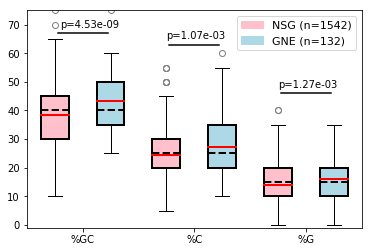

In [350]:
ax1=plt.subplot(111)

colors = ['pink','lightblue','pink','lightblue','pink','lightblue']


data =[ all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['%GC'],
        all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['%GC'],
       
        all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['%C'],
        all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['%C'],
       
        all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['%G'],
        all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['%G']]

for x in data:
    print np.mean(x), np.median(x)

bplot1 = ax1.boxplot(data, patch_artist=True, meanline=True, showmeans=True,
                    meanprops={'linestyle':'-', 'color':'red', 'linewidth':2})

plt.legend(handles=[pink_patch, blue_patch], fontsize=11)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)
plt.setp(bplot1['medians'], linestyle='--')

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)

plt.xticks([1.5,3.5,5.5],['%GC', '%C', '%G'])

plt.ylim(-1,75)

plt.plot([1.05,1.95], [67,67], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[0],data[1], equal_var=False)[1], 2)))
plt.text(1.09,69, annot, fontsize = 10)


plt.plot([3.05,3.95], [63,63], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[2], 
                                                                    data[3], equal_var=False)[1], 2)))
plt.text(3.0,65, annot, fontsize = 10)


plt.plot([5.05,5.95], [46,46], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[4], 
                                                                    data[5], equal_var=False)[1], 2)))
plt.text(5.0,48, annot, fontsize = 10)
             
print stats.ttest_ind(data[0], data[1], equal_var=False)
print stats.ttest_ind(data[2], data[3], equal_var=False)
print stats.ttest_ind(data[4], data[5], equal_var=False)
print len(data[0]), len(data[1])

print (43.29545454545455)/38.31712062256809
print (27.15909090909091)/24.283398184176395
print (16.136363636363637)/14.033722438391699

39.165747380033096 40.0
43.732638888888886 45.0
24.726282404853833 25.0
27.178819444444443 25.0
14.439464975179261 15.0
16.553819444444443 15.0
Ttest_indResult(statistic=-11.330341703626353, pvalue=3.583621655505061e-27)
Ttest_indResult(statistic=-6.236353490309761, pvalue=8.332267208396205e-10)
Ttest_indResult(statistic=-6.433215660759752, pvalue=2.511940468141789e-10)
14504 576
1.11660422217
1.09918745566
1.14642886512


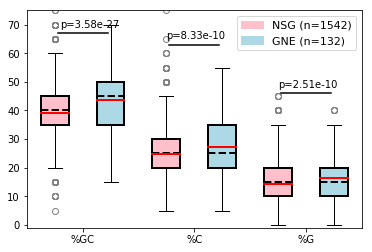

In [353]:
ax1=plt.subplot(111)

colors = ['pink','lightblue','pink','lightblue','pink','lightblue']


data =[ all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['%GC'],
        all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['%GC'],
       
        all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['%C'],
        all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['%C'],
       
        all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01]['%G'],
        all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01]['%G']]

for x in data:
    print np.mean(x), np.median(x)

bplot1 = ax1.boxplot(data, patch_artist=True, meanline=True, showmeans=True,
                    meanprops={'linestyle':'-', 'color':'red', 'linewidth':2})

plt.legend(handles=[pink_patch, blue_patch], fontsize=11)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)
plt.setp(bplot1['medians'], linestyle='--')

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)

plt.xticks([1.5,3.5,5.5],['%GC', '%C', '%G'])

plt.ylim(-1,75)

plt.plot([1.05,1.95], [67,67], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[0],data[1], equal_var=False)[1], 2)))
plt.text(1.09,69, annot, fontsize = 10)


plt.plot([3.05,3.95], [63,63], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[2], 
                                                                    data[3], equal_var=False)[1], 2)))
plt.text(3.0,65, annot, fontsize = 10)


plt.plot([5.05,5.95], [46,46], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[4], 
                                                                    data[5], equal_var=False)[1], 2)))
plt.text(5.0,48, annot, fontsize = 10)
             
print stats.ttest_ind(data[0], data[1], equal_var=False)
print stats.ttest_ind(data[2], data[3], equal_var=False)
print stats.ttest_ind(data[4], data[5], equal_var=False)
print len(data[0]), len(data[1])

print (43.732638888888886)/39.165747380033096
print (27.178819444444443)/24.726282404853833
print (16.553819444444443)/14.439464975179261

In [370]:
pink_patch = mpatches.Patch(color='pink', label='NSG (n=16046)')
blue_patch = mpatches.Patch(color='lightblue', label='GNE (n=748)')

39.084195438115415 40.0
43.65112994350282 45.0
24.683721799825502 25.0
27.175141242937855 25.0
14.400473638289917 15.0
16.475988700564972 15.0
Ttest_indResult(statistic=-12.701068924603433, pvalue=1.0965084385359608e-33)
Ttest_indResult(statistic=-6.973689007028636, pvalue=6.712209740915404e-12)
Ttest_indResult(statistic=-7.098668954555655, pvalue=2.884516590060231e-12)
16046 708
1.11684862524
1.10093370292
1.14412824983


Text(0,0.5,'Nucleotide content (%)')

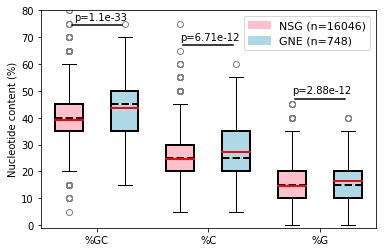

In [372]:
ax1=plt.subplot(111)

colors = ['pink','lightblue','pink','lightblue','pink','lightblue']


data =[ all_guides[all_guides['z_score_meanSE'] > -2.01]['%GC'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%GC'],
       
        all_guides[all_guides['z_score_meanSE'] > -2.01]['%C'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%C'],
       
        all_guides[all_guides['z_score_meanSE'] > -2.01]['%G'],
        all_guides[all_guides['z_score_meanSE'] <= -2.01]['%G']]

for x in data:
    print np.mean(x), np.median(x)

bplot1 = ax1.boxplot(data, patch_artist=True, meanline=True, showmeans=True,
                    meanprops={'linestyle':'-', 'color':'red', 'linewidth':2})

plt.legend(handles=[pink_patch, blue_patch], fontsize=11)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
    
plt.setp(bplot1['medians'], color='black')
plt.setp(bplot1['medians'], linewidth=2)
plt.setp(bplot1['medians'], linestyle='--')

plt.setp(bplot1['fliers'], markeredgecolor='grey')

plt.setp(bplot1['boxes'], linewidth=2)

plt.xticks([1.5,3.5,5.5],['%GC', '%C', '%G'])

plt.ylim(-1,80)

plt.plot([1.05,1.95], [74.5,74.5], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[0],data[1], equal_var=False)[1], 2)))
plt.text(1.09,76.5, annot, fontsize = 10)


plt.plot([3.05,3.95], [67,67], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[2], 
                                                                    data[3], equal_var=False)[1], 2)))
plt.text(3.0,69, annot, fontsize = 10)


plt.plot([5.05,5.95], [47,47], linestyle = '-', color = 'k')
annot =  str('p='+ str(np.format_float_scientific(stats.ttest_ind(data[4], 
                                                                    data[5], equal_var=False)[1], 2)))
plt.text(5.0,49, annot, fontsize = 10)
             
print stats.ttest_ind(data[0], data[1], equal_var=False)
print stats.ttest_ind(data[2], data[3], equal_var=False)
print stats.ttest_ind(data[4], data[5], equal_var=False)
print len(data[0]), len(data[1])

print (43.65112994350282)/39.084195438115415
print (27.175141242937855)/24.683721799825502
print (16.475988700564972)/14.400473638289917

plt.ylabel('Nucleotide content (%)')

In [325]:
stats.ttest_ind(data[0],data[1], equal_var=False)

Ttest_indResult(statistic=-6.119454282401633, pvalue=1.1671595111797604e-09)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0]


(array([0.00454545, 0.01515152, 0.04090909, 0.05909091, 0.04545455,
        0.02272727, 0.00909091, 0.0030303 , 0.        , 0.        ,
        0.        ]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 11 Patch objects>)

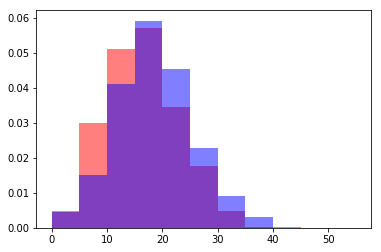

In [274]:
bins = [x for x in np.arange(0,55.1,5)]
print bins

plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01]['%G'], color='red', density=True,
        alpha=0.5, bins=bins)
plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01]['%G'], color='blue', density=True,
        alpha=0.5, bins=bins)

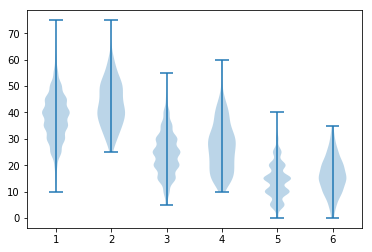

In [276]:
ax1=plt.subplot(111)
bplot1 = ax1.violinplot(data)

## Effect of mutational position on efficiency or GC content

In [74]:
protein_prop_table = pd.read_csv('./SGD_export2.tsv', sep = '\t', index_col=0, header=None, 
                                 names = ['stan_name','name', 'half_life_val', 'half_life_unit', 'hydropath', 
                                          'codon_adapt_index','codon_bias', 'instability_index', 
                                          'freq_opt_codon', 'length', 'aliphatic_index',
                                          'aromaticity', 'mol_weigth'])

chip_annot_data['mut_pos'] = np.nan
chip_annot_data['mut_pos'] = chip_annot_data['mut_pos'].astype('float64')

for guide in chip_annot_data.index:
    
    edit = str(chip_annot_data.loc[guide]['mut1_C>G'])
    
    if edit not in [np.nan] and '|' in edit:
    
        if chip_annot_data.loc[guide]['target'] in protein_prop_table.index:
            
            if 'silent' not in edit:

                prot_len = protein_prop_table.loc[chip_annot_data.loc[guide]['target']]['length']

                mut_pos = int(edit.split('|')[1])*1.0/prot_len          

                chip_annot_data.at[guide, ('mut_pos')] = mut_pos
                
            else:
                prot_len = protein_prop_table.loc[chip_annot_data.loc[guide]['target']]['length']
                
                mut_pos = int(edit.split('|')[3])*1.0/prot_len          

                chip_annot_data.at[guide, ('mut_pos')] = mut_pos
                

In [81]:
abundance_mesured = [x for x in chip_annot_data.index if x in z_score_table.index]

all_guides = chip_annot_data.loc[abundance_mesured]

all_guides['z_score_meanSE'] = z_score_table['z_score_meanSE']
all_guides['over_threshold'] = z_score_table['over_threshold']


hits = all_guides['z_score_meanSE'] <= -2.01
no_hit = all_guides['z_score_meanSE'] > -2.01

stop_codon_CG1 = (all_guides['mut1_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG1])


stop_codon_CT1 = (all_guides['mut1_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT1])


stop_codon_CG2 = (all_guides['mut2_C>G'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CG2])

stop_codon_CT2 = (all_guides['mut2_C>T'].str.contains('\*')) & (all_guides['orf_type'] == 'essential')
print len(all_guides[stop_codon_CT2])

all_stop = stop_codon_CG1 | stop_codon_CT1 | stop_codon_CG2 | stop_codon_CT2
print len(all_guides[all_stop])

print all_guides[all_stop].index[0]

all_stop_guides = all_guides[all_stop]
all_non_stop_guides = all_guides[~all_stop]

480
752
240
473
1674
chrI_59828r


[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001]
14025
0.00591216216216
0.801526717557


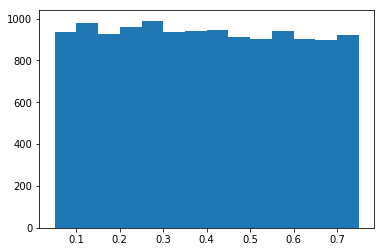

In [82]:
bins = [x for x in np.arange(0.05, 0.76, 0.05)]
print bins

plt.hist(all_guides.mut_pos.dropna(), bins = bins)
print len(all_guides.mut_pos.dropna())

print min(all_guides.mut_pos.dropna())
print max(all_guides.mut_pos.dropna())
# the discrepancy is caused by differences in annotation files and because the alognemnt position used did not take
# into account the orientation of the guide to calculate relative position

125
1364
Ks_2sampResult(statistic=0.07696187683284461, pvalue=0.4905992412590817)


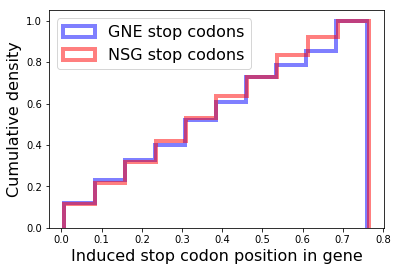

In [83]:
plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(), 
         density=True, color = 'blue', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4)
print len(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna())


plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna(), 
         density=True, color = 'red', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4)
print len(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna())

plt.xlabel('Induced stop codon position in gene', fontsize=16)
plt.ylabel('Cumulative density', fontsize = 16)
plt.legend(['GNE stop codons', 'NSG stop codons'], loc='upper left', fontsize=16)


print stats.ks_2samp(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(),
              all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna())

In [84]:
print all_guides.columns

Index([u'number', u'orf_type', u'target', u'position', u'strand', u'sequence',
       u'mut1_C>G', u'mut1_C>T', u'mut2_C>G', u'mut2_C>T', u'stan_name',
       u'name', u'half_life_val', u'half_life_unit', u'half_life_min',
       u'hydropath', u'codon_adapt_index', u'codon_bias', u'instability_index',
       u'freq_opt_codon', u'length', u'aliphatic_index', u'aromaticity',
       u'mol_weigth', u'diversity_PTM', u'PTM_number', u'PTM_rate',
       u'mut_1_effect_bin', u'mut_1_effect', u'mut_1_proximity',
       u'mut_2_effect_bin', u'mut_2_effect', u'mut_2_proximity',
       u'co_edit_risk', u'z_score_meanSE', u'over_threshold', u'grna_binding',
       u'%GC', u'orf_strand', u'mut_pos'],
      dtype='object')


SpearmanrResult(correlation=-0.06947074713251984, pvalue=0.007325002182786268)


Text(0,0.5,'%GC content')

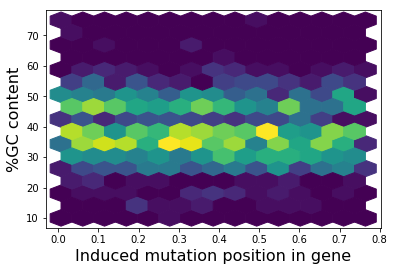

In [85]:
guides_with_pos = all_stop_guides.mut_pos.dropna().index

plt.hexbin(all_stop_guides.loc[guides_with_pos]['mut_pos'], all_stop_guides.loc[guides_with_pos]['%GC'],
           gridsize = 14)

print stats.spearmanr(all_stop_guides.loc[guides_with_pos]['mut_pos'], all_stop_guides.loc[guides_with_pos]['%GC'])

plt.xlabel('Induced mutation position in gene', fontsize=16)
plt.ylabel('%GC content', fontsize=16)

### Make Figure S11

125 stop GNEs w/ mut pos
1364 stop NSG w/ mut pos
516 GNEs w/ mut pos
12020 NSG w/ mut pos
SpearmanrResult(correlation=-0.05401104304302998, pvalue=1.4384100679141624e-09)


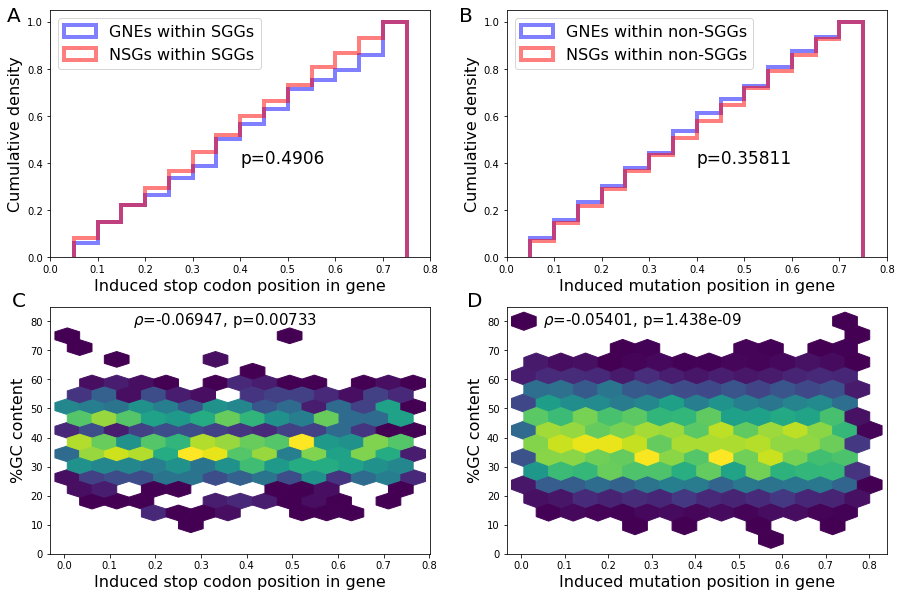

In [88]:
plt.figure(figsize = (15,10))

plt.subplot(221)

plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(), 
         density=True, color = 'blue', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4, bins = bins)
print len(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna()), 'stop GNEs w/ mut pos'


plt.hist(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna(), 
         density=True, color = 'red', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4, bins = bins)
print len(all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna()), 'stop NSG w/ mut pos'

plt.xlabel('Induced stop codon position in gene', fontsize=16)
plt.ylabel('Cumulative density', fontsize = 16)
plt.legend(['GNEs within SGGs', 'NSGs within SGGs'], loc='upper left', fontsize=16)
plt.xlim(0,0.8)



#print stats.ks_2samp(all_stop_guides[all_stop_guides['over_threshold'] == 'Yes'].mut_pos.dropna(),
#              all_stop_guides[all_stop_guides['over_threshold'] == 'No'].mut_pos.dropna())
p_val = stats.ks_2samp(all_stop_guides[all_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(),
              all_stop_guides[all_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna())[1]
plt.text(0.4,0.4, ('p='+str(round(p_val,5))), fontsize =17)

plt.text(-0.09,1, 'A', fontsize=20)
# add panel label

############################################################
plt.subplot(222)

plt.hist(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(), 
         density=True, color = 'blue', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4, bins = bins)
print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna()), 'GNEs w/ mut pos'


plt.hist(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna(), 
         density=True, color = 'red', alpha=0.5, cumulative = True, histtype ='step', linewidth = 4, bins = bins)
print len(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna()), 'NSG w/ mut pos'

plt.xlabel('Induced mutation position in gene', fontsize=16)
plt.ylabel('Cumulative density', fontsize = 16)
plt.legend(['GNEs within non-SGGs', 'NSGs within non-SGGs'], loc='upper left', fontsize=16)
plt.xlim(0,0.8)



#print stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'Yes'].mut_pos.dropna(),
#              all_non_stop_guides[all_non_stop_guides['over_threshold'] == 'No'].mut_pos.dropna())
p_val = stats.ks_2samp(all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] <= -2.01].mut_pos.dropna(),
              all_non_stop_guides[all_non_stop_guides['z_score_meanSE'] > -2.01].mut_pos.dropna())[1]
plt.text(0.4,0.4, ('p='+str(round(p_val,5))), fontsize =17)

plt.text(-0.1,1, 'B', fontsize=20)
# add panel label



################################################
plt.subplot(223)

guides_with_pos = all_stop_guides.mut_pos.dropna().index

plt.hexbin(all_stop_guides.loc[guides_with_pos]['mut_pos'], all_stop_guides.loc[guides_with_pos]['%GC'],
           gridsize = 14, mincnt=1)

spear_r =  stats.spearmanr(all_stop_guides.loc[guides_with_pos]['mut_pos'], 
                           all_stop_guides.loc[guides_with_pos]['%GC'])

plt.xlabel('Induced stop codon position in gene', fontsize=16)
plt.ylabel('%GC content', fontsize=16)

plt.text(0.15,79, (r'$\rho$='+str(round(spear_r[0],5))+', p='+str(round(spear_r[1],5))), fontsize =15, color='k')
plt.ylim(0,85)

plt.text(-0.115,85, 'C', fontsize=20)
# add panel label


##############################################
plt.subplot(224)
# panel 

guides_with_pos = all_non_stop_guides.mut_pos.dropna().index

plt.hexbin(all_non_stop_guides.loc[guides_with_pos]['mut_pos'], all_non_stop_guides.loc[guides_with_pos]['%GC'],
           gridsize = 14, mincnt=1)

spear_r =  stats.spearmanr(all_non_stop_guides.loc[guides_with_pos]['mut_pos'], 
                           all_non_stop_guides.loc[guides_with_pos]['%GC'])

print spear_r
plt.ylim(0,85)


plt.xlabel('Induced mutation position in gene', fontsize=16)
plt.ylabel('%GC content', fontsize=16)



plt.text(0.05,79, (r'$\rho$='+str(round(spear_r[0],5))+', p='+str(np.format_float_scientific(spear_r[1], 
                                                                                             precision = 3))),
                   fontsize =15, color='k')

plt.text(-0.125,85, 'D', fontsize=20)
# add panel label

plt.savefig('./FigureS17.svg', format='svg', dpi = 300)
# save figure

In [ ]:
print min(all_non_stop_guides.loc[guides_with_pos]['%GC'])
print max(all_non_stop_guides.loc[guides_with_pos]['%GC'])



## Mutations affecting PTMs: statistics

In [94]:
affects_PTM_1 = all_guides['mut_1_effect_bin']==1
affects_PTM_2 = all_guides['mut_2_effect_bin']==1
# filter for mutations predicted to affect PTM sites

over_threshold = all_guides['z_score_meanSE'] <= -2.01
# filter for GNEs

affects_PTM = affects_PTM_1 | affects_PTM_2
# filter for guides with at least one mutation affecting a PTM site


near_PTM_1 = all_guides['mut_1_proximity']==1
near_PTM_2 = all_guides['mut_2_proximity']==1
# filter for guides mutating a residue near a known PTM

near_PTM = near_PTM_1 | near_PTM_2
# filter for guides with a t least one mutation near a known PTM


print len(all_guides[affects_PTM_1]), len(all_guides[affects_PTM_2]), len(all_guides[affects_PTM])
print 'guides with direct PTM mutation'

print len(all_guides[near_PTM_1]), len(all_guides[near_PTM_2]), len(all_guides[near_PTM])
print 'guides with indirect effect on PTM'

################## values and test for direct PTM KO
print len(all_guides[affects_PTM&over_threshold]), len(all_guides[affects_PTM&~over_threshold])
print len(all_guides[~affects_PTM&over_threshold]), len(all_guides[~affects_PTM&~over_threshold])
print len(all_guides[affects_PTM&over_threshold])*1.0/len(all_guides[affects_PTM&~over_threshold])
print len(all_guides[~affects_PTM&over_threshold])*1.0/len(all_guides[~affects_PTM&~over_threshold])

print 0.0781893/0.0713961, ' fold GNE enrichment'


print stats.fisher_exact([[12,251],[696,15795]])

240 23 263
guides with direct PTM mutation
1712 139 1851
guides with indirect effect on PTM
12 251
696 15795
0.0478087649402
0.0440645773979
1.09514805431  fold GNE enrichment
(1.0849704629756836, 0.7563166891492863)


In [92]:
all_guides.columns

Index([u'number', u'orf_type', u'target', u'position', u'strand', u'sequence',
       u'mut1_C>G', u'mut1_C>T', u'mut2_C>G', u'mut2_C>T', u'stan_name',
       u'name', u'half_life_val', u'half_life_unit', u'half_life_min',
       u'hydropath', u'codon_adapt_index', u'codon_bias', u'instability_index',
       u'freq_opt_codon', u'length', u'aliphatic_index', u'aromaticity',
       u'mol_weigth', u'diversity_PTM', u'PTM_number', u'PTM_rate',
       u'mut_1_effect_bin', u'mut_1_effect', u'mut_1_proximity',
       u'mut_2_effect_bin', u'mut_2_effect', u'mut_2_proximity',
       u'co_edit_risk', u'z_score_meanSE', u'over_threshold', u'grna_binding',
       u'%GC', u'orf_strand', u'mut_pos'],
      dtype='object')

In [93]:
print all_guides[affects_PTM&over_threshold][['target','mut1_C>G', u'mut1_C>T', 'stan_name']]

                 target  mut1_C>G              mut1_C>T stan_name
guide_name                                                       
chrIV_916933r   YDR226W   K|156|N  silent|AAG>AAA|K|156      ADK1
chrV_158676r    YER003C   H|111|D               H|111|Y     PMI40
chrXIII_98368   YML085C   K|305|N  silent|AAG>AAA|K|305      TUB1
chrXIV_183961r  YNL247W   C|369|S               C|369|Y       NaN
chrXIV_243142   YNL216W   T|486|R               T|486|I      RAP1
chrXV_182920    YOL078W   S|414|C               S|414|F      AVO1
chrXV_733064r   YOR207C   Y|125|*  silent|TAC>TAT|Y|125      RET1
chrXVI_112899   YPL231W  S|1417|C              S|1417|F      FAS2
chrXVI_751226r  YPR112C   S|225|W               S|225|L      MRD1
chrXVI_899498   YPR181C    C|56|S                C|56|Y     SEC23
chrXVI_899499   YPR181C    C|56|S                C|56|Y     SEC23
chrXVI_911681r  YPR187W   K|123|N  silent|AAG>AAA|K|123     RPO26


In [96]:
################# values and test for near PTM

print len(all_guides[near_PTM&over_threshold]), len(all_guides[near_PTM&~over_threshold])
print len(all_guides[~near_PTM&over_threshold]), len(all_guides[~near_PTM&~over_threshold])
print len(all_guides[near_PTM&over_threshold])*1.0/len(all_guides[near_PTM&~over_threshold])
print len(all_guides[~near_PTM&over_threshold])*1.0/len(all_guides[~near_PTM&~over_threshold])

print 0.0765607/0.0708853, ' fold GNE enrichment'

print stats.fisher_exact([[88,1763],[620,14283]])


88 1763
620 14283
0.0499149177538
0.043408247567
1.08006455499  fold GNE enrichment
(1.1498947907708634, 0.24413384293696605)


## Find mutation patterns that are enriched (Figure 3A)

In [98]:
def mut_entry_to_two_letter(mut):
    
    if 'silent' in mut:
        return 'silent'
    
    elif 'invalid seq' in mut:
        return 'intron/put_NF'
    
    elif 'error' in mut:
        return 'invalid seq'
    
    else:
    
        mut = mut.split('|')
        mut = '>'.join([mut[0], mut[2]])
        return mut
    
def holmbonferroni_corr(p_value_dict):
    
    nobs = len(p_value_dict.keys())
    
    adjust_alpha_list = [0.05/(nobs-x+1) for x in range(1,(nobs+1))]
    
    sort_pval = sorted(p_value_dict.values())
    
    for x in range(0,nobs):
        
        threshold = adjust_alpha_list[x]
        
        if sort_pval[x] > threshold:
            
            return threshold

In [99]:
ref_pattern_counter_1_CtoG = Counter()
ref_pattern_counter_1_CtoT = Counter()
ref_pattern_counter_2_CtoG = Counter()
ref_pattern_counter_2_CtoT = Counter()

NSG_index = all_guides[~over_threshold].index
print len(NSG_index)


for x in NSG_index:
    
    if '|' not in x:
                
        first_CtoG = chip_annot_data.loc[x]['mut1_C>G']
        first_CtoG = mut_entry_to_two_letter(first_CtoG)

        ref_pattern_counter_1_CtoG[first_CtoG] += 1

        first_CtoT = chip_annot_data.loc[x]['mut1_C>T']
        first_CtoT = mut_entry_to_two_letter(first_CtoT)


        ref_pattern_counter_1_CtoT[first_CtoT] += 1

        if chip_annot_data.loc[x]['mut2_C>G'] not in [np.NaN]:

            second_CtoG = chip_annot_data.loc[x]['mut2_C>G']
            second_CtoG = mut_entry_to_two_letter(second_CtoG)

            ref_pattern_counter_2_CtoG[second_CtoG] += 1

            second_CtoT = chip_annot_data.loc[x]['mut2_C>T']
            second_CtoT = mut_entry_to_two_letter(second_CtoT)


            ref_pattern_counter_2_CtoT[second_CtoT] += 1

print len(ref_pattern_counter_1_CtoG), ' patterns in NSGs C>G #1'
print len(ref_pattern_counter_1_CtoT), ' patterns in NSGs C>T #1'
print len(ref_pattern_counter_2_CtoG), ' patterns in NSGs C>G #2'
print len(ref_pattern_counter_2_CtoT), ' patterns in NSGs C>T #2'
       

hit_pattern_counter_1_CtoG = Counter()
hit_pattern_counter_1_CtoT = Counter()
hit_pattern_counter_2_CtoG = Counter()
hit_pattern_counter_2_CtoT = Counter()


GNE_index = all_guides[over_threshold].index
print len(GNE_index)

for x in GNE_index:
    
    if '|' not in x:
    
        first_CtoG = chip_annot_data.loc[x]['mut1_C>G']
        first_CtoG = mut_entry_to_two_letter(first_CtoG)

        hit_pattern_counter_1_CtoG[first_CtoG] += 1

        first_CtoT = chip_annot_data.loc[x]['mut1_C>T']
        first_CtoT = mut_entry_to_two_letter(first_CtoT)


        hit_pattern_counter_1_CtoT[first_CtoT] += 1

        if chip_annot_data.loc[x]['mut2_C>G'] not in [np.NaN]:

            second_CtoG = chip_annot_data.loc[x]['mut2_C>G']
            second_CtoG = mut_entry_to_two_letter(second_CtoG)

            hit_pattern_counter_2_CtoG[second_CtoG] += 1

            second_CtoT = chip_annot_data.loc[x]['mut2_C>T']
            second_CtoT = mut_entry_to_two_letter(second_CtoT)

            hit_pattern_counter_2_CtoT[second_CtoT] += 1
            
print len(hit_pattern_counter_1_CtoG), ' patterns in GNEs C>G #1'
print len(hit_pattern_counter_1_CtoT), ' patterns in GNEs C>T #1'
print len(hit_pattern_counter_2_CtoG), ' patterns in GNEs C>G #2'
print len(hit_pattern_counter_2_CtoT), ' patterns in GNEs C>T #2'            




16046
41  patterns in NSGs C>G #1
32  patterns in NSGs C>T #1
41  patterns in NSGs C>G #2
32  patterns in NSGs C>T #2
708
40  patterns in GNEs C>G #1
30  patterns in GNEs C>T #1
40  patterns in GNEs C>G #2
28  patterns in GNEs C>T #2


## For C>G/C>T mutation pairs

In [100]:
ref_pattern_counter_first_pair = Counter()
ref_pattern_counter_second_pair = Counter()

for x in NSG_index:
    
    if '|' not in x:
    
        first_CtoG = chip_annot_data.loc[x]['mut1_C>G']
        first_CtoG = mut_entry_to_two_letter(first_CtoG)

        first_CtoT = chip_annot_data.loc[x]['mut1_C>T']
        first_CtoT = mut_entry_to_two_letter(first_CtoT)

        pair = first_CtoG+'/'+first_CtoT

        ref_pattern_counter_first_pair[pair]+=1


        if chip_annot_data.loc[x]['mut2_C>G'] not in [np.NaN]:

            second_CtoG = chip_annot_data.loc[x]['mut2_C>G']
            second_CtoG = mut_entry_to_two_letter(second_CtoG)


            second_CtoT = chip_annot_data.loc[x]['mut2_C>T']
            second_CtoT = mut_entry_to_two_letter(second_CtoT)

            pair_2 = second_CtoG+'/'+second_CtoT
            ref_pattern_counter_second_pair[pair_2] += 1
            
print len(ref_pattern_counter_first_pair), ' pattern pair in NSGs mut #1'
print len(ref_pattern_counter_second_pair), ' pattern pair in NSGs mut #2'
        

hit_pattern_counter_first_pair = Counter()
hit_pattern_counter_second_pair = Counter()


for x in GNE_index:
    
    if '|' not in x:
    
        first_CtoG = chip_annot_data.loc[x]['mut1_C>G']
        first_CtoG = mut_entry_to_two_letter(first_CtoG)

        first_CtoT = chip_annot_data.loc[x]['mut1_C>T']
        first_CtoT = mut_entry_to_two_letter(first_CtoT)

        pair = first_CtoG+'/'+first_CtoT
        hit_pattern_counter_first_pair[pair]+=1


        if chip_annot_data.loc[x]['mut2_C>G'] not in [np.NaN]:

            second_CtoG = chip_annot_data.loc[x]['mut2_C>G']
            second_CtoG = mut_entry_to_two_letter(second_CtoG)



            second_CtoT = chip_annot_data.loc[x]['mut2_C>T']
            second_CtoT = mut_entry_to_two_letter(second_CtoT)

            pair_2 = second_CtoG+'/'+second_CtoT
            hit_pattern_counter_second_pair[pair_2] += 1
            
print len(hit_pattern_counter_first_pair), ' pattern pair in GNEs mut #1'
print len(hit_pattern_counter_second_pair), ' pattern pair in GNEs mut #2'

print sorted(hit_pattern_counter_first_pair.keys())
print sorted(hit_pattern_counter_second_pair.keys())


49  pattern pair in NSGs mut #1
49  pattern pair in NSGs mut #2
47  pattern pair in GNEs mut #1
45  pattern pair in GNEs mut #2
['A>G/A>V', 'A>P/A>T', 'C>S/C>Y', 'C>W/silent', 'D>E/silent', 'D>H/D>N', 'E>D/silent', 'E>Q/E>K', 'F>L/silent', 'G>A/G>D', 'G>A/G>E', 'G>R/G>R', 'G>R/G>S', 'H>D/H>Y', 'H>Q/silent', 'I>M/silent', 'K>N/silent', 'L>F/silent', 'L>V/L>F', 'L>V/silent', 'M>I/M>I', 'N>K/silent', 'P>A/P>S', 'P>R/P>L', 'Q>E/Q>*', 'Q>H/silent', 'R>G/R>C', 'R>G/R>W', 'R>P/R>H', 'R>P/R>Q', 'R>S/silent', 'R>T/R>K', 'S>*/S>L', 'S>C/S>F', 'S>R/silent', 'S>T/S>N', 'S>W/S>L', 'T>R/T>I', 'T>R/T>M', 'T>S/T>I', 'V>L/V>I', 'V>L/V>M', 'W>C/W>*', 'W>S/W>*', 'Y>*/silent', 'intron/put_NF/intron/put_NF', 'silent/silent']
['A>G/A>V', 'A>P/A>T', 'C>S/C>Y', 'C>W/silent', 'D>E/silent', 'D>H/D>N', 'E>D/silent', 'E>Q/E>K', 'F>L/silent', 'G>A/G>D', 'G>A/G>E', 'G>R/G>R', 'G>R/G>S', 'H>D/H>Y', 'H>Q/silent', 'I>M/silent', 'K>N/silent', 'L>F/silent', 'L>V/silent', 'M>I/M>I', 'N>K/silent', 'P>A/P>S', 'P>R/P>L', 'Q

### Mutation C>G \#1

16046
708
0.00178571428571


,in_GNEs,in_NSGs,GNE_prop,NSG_prop,enrichment,raw_fischer_pval,Holm_bonferroni_threshold
Pattern,,,,,,,
A>G,9,609,0.012712,0.037953,-2.985666,1.853155e-04,0.001786
A>P,48,551,0.067797,0.034339,1.974346,5.651786e-05,0.001786
C>S,14,184,0.019774,0.011467,1.724423,7.247133e-02,0.001786
C>W,1,58,0.001412,0.003615,-2.559142,5.198642e-01,0.001786
D>E,2,279,0.002825,0.017388,-6.155179,1.249355e-03,0.001786
D>H,48,860,0.067797,0.053596,1.264959,1.292242e-01,0.001786
E>D,11,243,0.015537,0.015144,1.025935,8.749354e-01,0.001786
E>Q,48,1024,0.067797,0.063817,1.062368,6.955958e-01,0.001786
F>L,4,309,0.005650,0.019257,-3.408513,6.068217e-03,0.001786


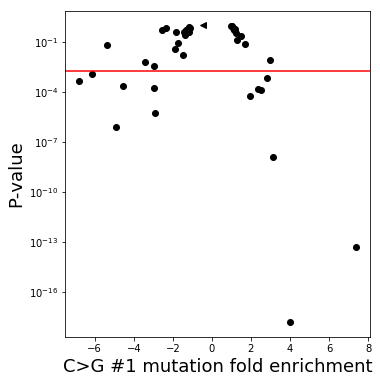

In [102]:
total_ref_counts = sum(ref_pattern_counter_1_CtoG.values())
print total_ref_counts
# get total NSG count, make sure it makes sense

total_hits_counts = sum(hit_pattern_counter_1_CtoG.values())
print total_hits_counts
# get total GNE count, make sure it makes sense

######################### Make a first plot as a draft and print enrichment + pvals and a dataframe with the data
plt.figure(figsize=(12,6))
plt.subplot(121)

pattern_p_dict_first_CtoG = {}

pattern_CG1_to_df = {}


for pattern in ref_pattern_counter_1_CtoG.keys():
    
    in_hits = hit_pattern_counter_1_CtoG[pattern]
    in_ref = ref_pattern_counter_1_CtoG[pattern]
    
    fischer_table = np.array([[in_hits , total_hits_counts] , [ in_ref, total_ref_counts] ])
    test = stats.fisher_exact(fischer_table)
    fischer_pval = test[1]
    
    
    pattern_p_dict_first_CtoG[pattern] = fischer_pval  
        
    ref_prop = in_ref*1.0/total_ref_counts
    
    if in_hits == 0:
        
        hit_prop = 1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        enrich = -1.0/enrich
        
        plt.plot(enrich, fischer_pval, '<k')
        
        
    else:
        
        hit_prop = in_hits*1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        if enrich < 1:
            
            enrich = -1.0/enrich
            
            plt.plot(enrich, fischer_pval, 'ko')
            
        else:
            plt.plot(enrich, fischer_pval, 'ko')
            
        df_entry = {}
        df_entry['in_GNEs'] = in_hits
        df_entry['in_NSGs'] = in_ref
        df_entry['GNE_prop'] = hit_prop
        df_entry['NSG_prop'] = ref_prop
        df_entry['enrichment'] = enrich
        df_entry['raw_fischer_pval'] = fischer_pval
        # make dict for df entry
        
        pattern_CG1_to_df[pattern] = df_entry

                    
plt.axhline(holmbonferroni_corr(pattern_p_dict_first_CtoG), c='red')
plt.ylabel('P-value', fontsize = 18)
plt.xlabel('C>G #1 mutation fold enrichment', fontsize = 18)

plt.yscale('log')

threshold_pattern_CG1 = holmbonferroni_corr(pattern_p_dict_first_CtoG)
print holmbonferroni_corr(pattern_p_dict_first_CtoG)
# now we know the threshold value for 5% FDR, so we can apply it on the main figure

pattern_CG1_df = pd.DataFrame.from_dict(pattern_CG1_to_df, orient='index', columns = ['in_GNEs',
                                                                                      'in_NSGs',
                                                                                      'GNE_prop',
                                                                                      'NSG_prop', 
                                                                                      'enrichment',
                                                                                      'raw_fischer_pval'])
pattern_CG1_df['Holm_bonferroni_threshold'] = threshold_pattern_CG1

pattern_CG1_df.index.names = ['Pattern']

pattern_CG1_df.to_csv('./Supplementary_table_2.csv', sep=',')


pattern_CG1_df.head(50)


### Mutation C>T \#1

16046
708
0.00227272727273


,in_GNEs,in_NSGs,GNE_prop,NSG_prop,enrichment,raw_fischer_pval,Holm_bonferroni_threshold
Pattern,,,,,,,
A>T,48,551,0.067797,0.034339,1.974346,5.651786e-05,0.002273
A>V,9,609,0.012712,0.037953,-2.985666,1.853155e-04,0.002273
C>Y,14,184,0.019774,0.011467,1.724423,7.247133e-02,0.002273
D>N,48,860,0.067797,0.053596,1.264959,1.292242e-01,0.002273
E>K,48,1024,0.067797,0.063817,1.062368,6.955958e-01,0.002273
G>D,23,186,0.032486,0.011592,2.802518,3.631317e-05,0.002273
G>E,4,72,0.005650,0.004487,1.259102,5.644351e-01,0.002273
G>R,14,127,0.019774,0.007915,2.498376,2.875887e-03,0.002273
G>S,54,259,0.076271,0.016141,4.725280,7.222104e-18,0.002273


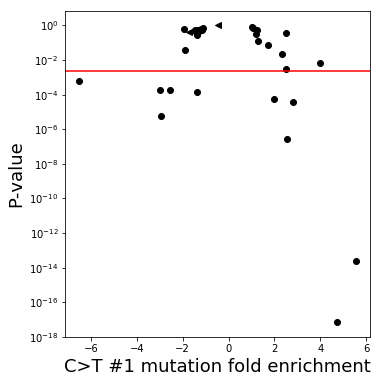

In [103]:
total_ref_counts = sum(ref_pattern_counter_1_CtoT.values())
print total_ref_counts
# get total NSG count, make sure it makes sense

total_hits_counts = sum(hit_pattern_counter_1_CtoT.values())
print total_hits_counts
# get total GNE count, make sure it makes sense

######################### Make a first plot as a draft and print enrichment + pvals and a dataframe with the data
plt.figure(figsize=(12,6))
plt.subplot(121)

pattern_p_dict_first_CtoT = {}

pattern_CT1_to_df = {}


for pattern in ref_pattern_counter_1_CtoT.keys():
    
    in_hits = hit_pattern_counter_1_CtoT[pattern]
    in_ref = ref_pattern_counter_1_CtoT[pattern]
    
    fischer_table = np.array([[in_hits , total_hits_counts] , [ in_ref, total_ref_counts] ])
    test = stats.fisher_exact(fischer_table)
    fischer_pval = test[1]
    
    
    pattern_p_dict_first_CtoT[pattern] = fischer_pval  
        
    ref_prop = in_ref*1.0/total_ref_counts
    
    if in_hits == 0:
        
        hit_prop = 1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        enrich = -1.0/enrich
        
        plt.plot(enrich, fischer_pval, '<k')
        
        
    else:
        
        hit_prop = in_hits*1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        if enrich < 1:
            
            enrich = -1.0/enrich
            
            plt.plot(enrich, fischer_pval, 'ko')
            
        else:
            plt.plot(enrich, fischer_pval, 'ko')
            
        df_entry = {}
        df_entry['in_GNEs'] = in_hits
        df_entry['in_NSGs'] = in_ref
        df_entry['GNE_prop'] = hit_prop
        df_entry['NSG_prop'] = ref_prop
        df_entry['enrichment'] = enrich
        df_entry['raw_fischer_pval'] = fischer_pval
        # make dict for df entry
        
        pattern_CT1_to_df[pattern] = df_entry

                    
plt.axhline(holmbonferroni_corr(pattern_p_dict_first_CtoT), c='red')
plt.ylabel('P-value', fontsize = 18)
plt.xlabel('C>T #1 mutation fold enrichment', fontsize = 18)

plt.yscale('log')

threshold_pattern_CT1 = holmbonferroni_corr(pattern_p_dict_first_CtoT)
print holmbonferroni_corr(pattern_p_dict_first_CtoT)
# now we know the threshold value for 5% FDR, so we can apply it on the main figure

pattern_CT1_df = pd.DataFrame.from_dict(pattern_CT1_to_df, orient='index', columns = ['in_GNEs',
                                                                                      'in_NSGs',
                                                                                      'GNE_prop',
                                                                                      'NSG_prop', 
                                                                                      'enrichment',
                                                                                      'raw_fischer_pval'])
pattern_CT1_df['Holm_bonferroni_threshold'] = threshold_pattern_CT1

pattern_CT1_df.index.names = ['Pattern']

pattern_CT1_df.to_csv('./Supplementary_table_3.csv', sep=',')


pattern_CT1_df.head(50)

### Mut. pair at position 1

16046
708
0.00138888888889


,in_GNEs,in_NSGs,GNE_prop,NSG_prop,enrichment,raw_fischer_pval,Holm_bonferroni_threshold
Pattern,,,,,,,
A>G/A>V,9,609,0.012712,0.037953,-2.985666,1.853155e-04,0.001389
A>P/A>T,48,551,0.067797,0.034339,1.974346,5.651786e-05,0.001389
C>S/C>Y,14,184,0.019774,0.011467,1.724423,7.247133e-02,0.001389
C>W/silent,1,58,0.001412,0.003615,-2.559142,5.198642e-01,0.001389
D>E/silent,2,279,0.002825,0.017388,-6.155179,1.249355e-03,0.001389
D>H/D>N,48,860,0.067797,0.053596,1.264959,1.292242e-01,0.001389
E>D/silent,11,243,0.015537,0.015144,1.025935,8.749354e-01,0.001389
E>Q/E>K,48,1024,0.067797,0.063817,1.062368,6.955958e-01,0.001389
F>L/silent,4,309,0.005650,0.019257,-3.408513,6.068217e-03,0.001389


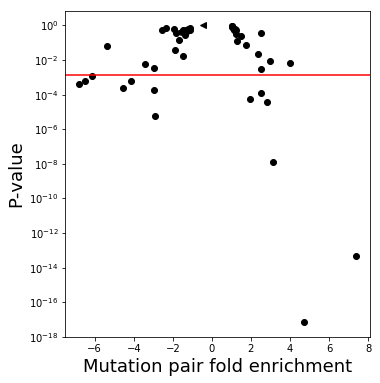

In [104]:
total_ref_counts = sum(ref_pattern_counter_first_pair.values())
print total_ref_counts
# get total NSG count, make sure it makes sense

total_hits_counts = sum(hit_pattern_counter_first_pair.values())
print total_hits_counts
# get total GNE count, make sure it makes sense

######################### Make a first plot as a draft and print enrichment + pvals and a dataframe with the data
plt.figure(figsize=(12,6))
plt.subplot(121)

pattern_p_dict_first_pair = {}

pattern_pair1_to_df = {}


for pattern in ref_pattern_counter_first_pair.keys():
    
    in_hits = hit_pattern_counter_first_pair[pattern]
    in_ref = ref_pattern_counter_first_pair[pattern]
    
    fischer_table = np.array([[in_hits , total_hits_counts] , [ in_ref, total_ref_counts] ])
    test = stats.fisher_exact(fischer_table)
    fischer_pval = test[1]
    
    
    pattern_p_dict_first_pair[pattern] = fischer_pval  
        
    ref_prop = in_ref*1.0/total_ref_counts
    
    if in_hits == 0:
        
        hit_prop = 1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        enrich = -1.0/enrich
        
        plt.plot(enrich, fischer_pval, '<k')
        
        
    else:
        
        hit_prop = in_hits*1.0/total_hits_counts
        
        enrich = hit_prop*1.0/ref_prop
        
        if enrich < 1:
            
            enrich = -1.0/enrich
            
            plt.plot(enrich, fischer_pval, 'ko')
            
        else:
            plt.plot(enrich, fischer_pval, 'ko')
            
        df_entry = {}
        df_entry['in_GNEs'] = in_hits
        df_entry['in_NSGs'] = in_ref
        df_entry['GNE_prop'] = hit_prop
        df_entry['NSG_prop'] = ref_prop
        df_entry['enrichment'] = enrich
        df_entry['raw_fischer_pval'] = fischer_pval
        # make dict for df entry
        
        pattern_pair1_to_df[pattern] = df_entry

                    
plt.axhline(holmbonferroni_corr(pattern_p_dict_first_pair), c='red')
plt.ylabel('P-value', fontsize = 18)
plt.xlabel('Mutation pair fold enrichment', fontsize = 18)

plt.yscale('log')

threshold_pattern_pair1 = holmbonferroni_corr(pattern_p_dict_first_pair)
print holmbonferroni_corr(pattern_p_dict_first_pair)
# now we know the threshold value for 5% FDR, so we can apply it on the main figure

pattern_pair1_df = pd.DataFrame.from_dict(pattern_pair1_to_df, orient='index', columns = ['in_GNEs',
                                                                                          'in_NSGs',
                                                                                          'GNE_prop',
                                                                                          'NSG_prop', 
                                                                                          'enrichment',
                                                                                          'raw_fischer_pval'])

pattern_pair1_df['Holm_bonferroni_threshold'] = threshold_pattern_pair1

pattern_pair1_df.index.names = ['Pattern']

pattern_pair1_df.to_csv('./Supplementary_table_4.csv', sep=',')

pattern_pair1_df.head(50)

## Figure 3A

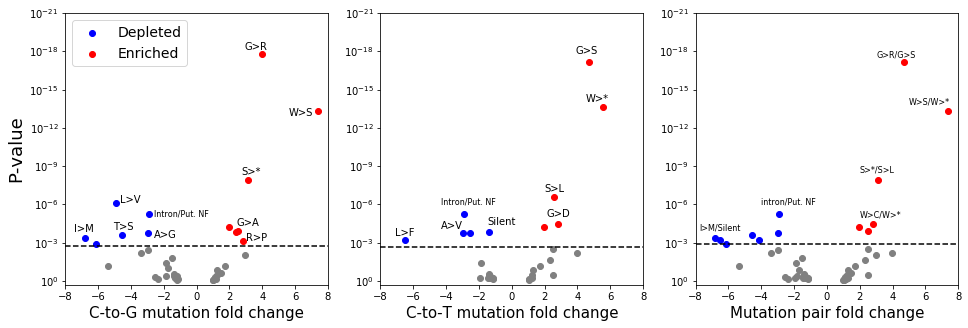

In [215]:
plt.figure(figsize = (16,5))
# create figure

################## plot values for CG1 enrichment
ax1 = plt.subplot(131)
# create subplot

significance_threshold = pattern_CG1_df.loc[pattern_CG1_df.index[0]]['Holm_bonferroni_threshold']
# extract Holm-Bonferroni theshold at 5% FDR for this group of p-values


for pattern in pattern_CG1_df.index:
    # Loop through patterns in dataframe for CG1 mutation
    
    enrich = pattern_CG1_df.loc[pattern]['enrichment']
    pval = pattern_CG1_df.loc[pattern]['raw_fischer_pval']
    # get enrichment values 
    
    color = 'grey'
    # set baseline marker color to grey
    
    if enrich > 1 and pval < significance_threshold:
        color = 'red'
        # if the enrichment is positive and significant, plot it in red
        
    if enrich < -1 and pval < significance_threshold:
        color = 'blue'
        # if the enrichment is positive and significant, plot it in blue
        
    ax1.scatter(enrich, pval, marker = 'o', color=color)
    # plot the formatted marker for this pattern 

plt.legend(['Depleted', 'Enriched'], loc = 'upper left', fontsize=14)


plt.ylabel('P-value', fontsize = 18)
plt.xlabel('C-to-G mutation fold change', fontsize = 15)
# make x and y axis label

plt.yscale('log')
# change y axis scale

plt.axhline(significance_threshold, color='k', linestyle = '--')
# plot significance threshold


plt.xlim(-8,8)
plt.ylim(2,1.0/10**21)
# set x and y axis limits

################## plot values for CT1 enrichment
ax2 = plt.subplot(132)
# create subplot


significance_threshold = pattern_CT1_df.loc[pattern_CT1_df.index[0]]['Holm_bonferroni_threshold']
# extract Holm-Bonferroni theshold at 5% FDR for this group of p-values

for pattern in pattern_CT1_df.index:
    # Loop through patterns in dataframe for CG1 mutation
    
    enrich = pattern_CT1_df.loc[pattern]['enrichment']
    pval = pattern_CT1_df.loc[pattern]['raw_fischer_pval']
    # get enrichment values 
    
    color = 'grey'
    # set baseline marker color to grey
    
    if enrich > 1 and pval < significance_threshold:
        color = 'red'
        # if the enrichment is positive and significant, plot it in red
        
    if enrich < -1 and pval < significance_threshold:
        color = 'blue'
        # if the enrichment is positive and significant, plot it in blue
        
    ax2.plot(enrich, pval, marker = 'o', color=color)
    # plot the formatted marker for this pattern



plt.xlabel('C-to-T mutation fold change', fontsize = 15)
# make x axis label

plt.yscale('log')
# change y axis scale


plt.axhline(significance_threshold, color='black', linestyle = '--')
# plot significance threshold

plt.xlim(-8,8)
plt.ylim(2,1.0/10**21)
# set x and y axis limits


################## plot values for pair enrichment
ax3 = plt.subplot(133)
# create subplot


significance_threshold = pattern_pair1_df.loc[pattern_pair1_df.index[0]]['Holm_bonferroni_threshold']
# extract Holm-Bonferroni theshold at 5% FDR for this group of p-values


for pattern in pattern_pair1_df.index:
    # Loop through patterns in dataframe for CG1 mutation
    
    enrich = pattern_pair1_df.loc[pattern]['enrichment']
    pval = pattern_pair1_df.loc[pattern]['raw_fischer_pval']
    # get enrichment values 
    
    color = 'grey'
    # set baseline marker color to grey
    
    if enrich > 1 and pval < significance_threshold:
        color = 'red'
        # if the enrichment is positive and significant, plot it in red
        
    if enrich < -1 and pval < significance_threshold:
        color = 'blue'
        # if the enrichment is positive and significant, plot it in blue
        
    ax3.plot(enrich, pval, marker = 'o', color=color)
    # plot the formatted marker for this pattern

#annotations for CT1 pattern plot
ax1.text(5.6, 12.0E-014, 'W>S', fontsize=10)
ax1.text(2.9, 8.0E-019, 'G>R', fontsize=10)
ax1.text(2.7, 5.0E-09, 'S>*', fontsize=10)
ax1.text(3, 0.0007, 'R>P', fontsize=10)
ax1.text(2.4, 0.00005, 'G>A', fontsize=10)

ax1.text(-2.6, 9.0E-006, 'Intron/Put. NF', fontsize=8)
ax1.text(-4.7, 8.0E-007, 'L>V', fontsize=10)
ax1.text(-2.6, 4.0E-04, 'A>G', fontsize=10)
ax1.text(-7.5, 0.00015, 'I>M', fontsize=10)
ax1.text(-5.1, 0.00010, 'T>S', fontsize=10)    
    
#annotations for CT1 pattern plot
ax2.text(2.1, 1.0306010364573E-005, 'G>D')
ax2.text(2, 1.0E-07, 'S>L')
ax2.text(3.9, 1.5E-018, 'G>S', fontsize =10)
ax2.text(4.5,1.0E-014, 'W>*', fontsize=10)

ax2.text(-7.1, 0.0003, 'L>F', fontsize =10)
ax2.text(-4.3, 0.00008, 'A>V', fontsize =10)
ax2.text(-4.3, 0.000001, 'Intron/Put. NF', fontsize =8)
ax2.text(-1.5, 4.0E-5, 'Silent', fontsize =10)

#annotations for pair pattern plot
ax3.text(-7.8,0.0001, 'I>M/Silent', fontsize = 8)
ax3.text(-4,1.0E-006, 'intron/Put. NF', fontsize = 8)

ax3.text(5,1.42971245301748E-014, 'W>S/W>*', fontsize = 8)
ax3.text(3, 3.0E-018, 'G>R/G>S', fontsize = 8)
ax3.text(2, 3.0E-9, 'S>*/S>L', fontsize = 8)
ax3.text(2, 1.0E-5, 'W>C/W>*', fontsize = 8)


plt.xlabel('Mutation pair fold change', fontsize = 15)
# make x axis label

plt.yscale('log')
# change y axis scale


plt.axhline(significance_threshold, color='black', linestyle = '--')
# plot significance threshold

plt.xlim(-8,8)
plt.ylim(2,1.0/10**21)
# set x and y axis limits


plt.savefig('./Figure5A.svg', format='svg' ,dpi=600)

In [412]:
over_threshold = all_guides['z_score_meanSE'] <= -2.01

print len(all_guides[over_threshold])

708


## list for Panther GO enrichment

In [417]:
gene_counter = Counter()

for gRNA in all_guides[over_threshold].index:
    target = all_guides.loc[gRNA]['target']
    
    gene_counter[target] += 1

print sum(gene_counter.values())



708


In [420]:
two_hits = [x for x in gene_counter.keys() if gene_counter[x] > 1]

for x in two_hits:
    print x

YMR205C
YPR041W
YER172C
YLR272C
YFR037C
YEL058W
YER126C
YDL031W
YKL104C
YLR457C
YBR202W
YPR112C
YML085C
YGL065C
YOR048C
YOR168W
YER003C
YER013W
YGR116W
YJL008C
YLR355C
YLR153C
YJR093C
YNR035C
YJL085W
YEL055C
YFL039C
YLR075W
YER133W_intron
YBR236C
YML031W
YOR341W
YGL092W
YNL251C
YGL022W
YHR089C
YHR165C
YGL169W
YLR277C
YDL195W
YKL078W
YNL112W
YPR016C
YPL243W
YLR293C
YKL173W
YKL182W
YJL014W
YOL123W
YDL126C
YCR072C
YER019W
YDR172W
YDL007W
YLL031C
YLR163C
YPL190C
YOR335C
YDL143W
YJL005W
YJL050W
YPL028W
YJR016C
YLR208W
YDR021W
YMR296C
YJR064W
YLR106C
YHR186C
YLR274W
YLR369W
YDL014W
YDL220C
YKL004W
YHR019C
YHR188C
YLR060W
YHR164C
YOR063W
YBR049C
YKR038C
YDR353W
YNL262W
YER094C
YLR212C
YLL003W
YOR157C
YAL034W-A
YDR232W
YDR228C
YGR264C
YGL055W
YPR181C
YFL037W
YLL008W
YGL207W
YOL021C
YOR373W
YCL017C
YNL172W
YOL010W
YIL126W
YML127W
YPL228W
YNL247W
YPL082C
YFR028C
YPR034W
YBR080C
YKL006C-A_intron
YIL109C
YDR037W
YMR001C
YMR309C
YGL001C
YDL205C
YOR116C
YOR326W
YGR140W
YMR108W
YER025W
YNL039W
YER171